In [1]:
cd ..

/Users/Mason/Desktop/Columbia/computational-methods-in-finance/cfinance-filtering


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from importlib import reload
from filtering.filtering import kf
from filtering.filtering import particle_filter as pf

# Import and plot data

In [3]:
snp = pd.read_csv('./data/SNP.csv').set_index('Date')
oil = pd.read_csv('./data/OIL.csv').set_index('DATE')
oil = oil[oil[oil.columns[-1]] != '.'].astype('float')
snp = snp.Close
data = pd.concat([oil, snp], axis=1, sort=True).dropna()
data.columns = ['DCOILWTICO', 'SNP']

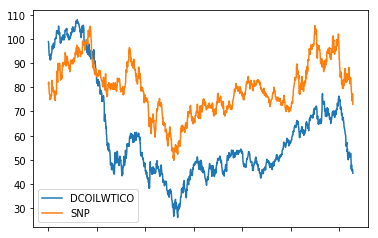

In [4]:
data.plot()

# Filtering

In [5]:
# hyperparams
dt = 1/252 # daily volatility as there are ~252 trading days
mu = (-0.4, 0.4)
kappa = (1e-3, 9)
theta = (1e-3, 1)
sigma = (1e-3, 1)
rho = (-1, 1)
v0 = (1e-3, 0.8)

In [6]:
bounds = [mu, kappa, theta, sigma, rho, v0]

In [165]:
init_params = [(a+b)/2 for a, b in bounds]

### Filtering DCOILWTICO

In [7]:
oil = np.log(oil.DCOILWTICO.as_matrix())

/Users/Mason/Desktop/Columbia/computational-methods-in-finance/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [8]:
reload(kf)

<module 'filtering.filtering.kf' from '/Users/Mason/Desktop/Columbia/computational-methods-in-finance/cfinance-filtering/filtering/filtering/kf.py'>

In [154]:
maxiter=1000
ekf = kf.EKFHeston(oil, dt=dt, bounds=bounds, is_log=True)
ukf = kf.UKFHeston(oil, dt=dt, bounds=bounds, is_log=True)

num_particles = 2000
pf_heston = pf.PFHeston(oil, dt=dt, N=num_particles, is_log=True)

In [155]:
# taking mean of bounds as init
init_params = [((a+b)/2) for a,b in bounds]

# EKF

In [11]:
ekf_opt = ekf.optimize(init_params, maxiter=maxiter)

i: 1
x_i: [1.2500000e-04 4.6130125e+00 5.1301250e-01 5.1301250e-01 1.2500000e-04
 3.6045000e-01]
f_i: -6.163852449516915
i: 2
x_i: [1.2500000e-04 4.6130125e+00 5.1301250e-01 5.1301250e-01 1.2500000e-04
 3.6045000e-01]
f_i: -6.163852449516915
i: 3
x_i: [1.2500000e-04 4.6130125e+00 5.1301250e-01 5.1301250e-01 1.2500000e-04
 3.6045000e-01]
f_i: -6.163852449516915
i: 4
x_i: [1.2500000e-04 4.6130125e+00 5.1301250e-01 5.1301250e-01 1.2500000e-04
 3.6045000e-01]
f_i: -6.163852449516915
i: 5
x_i: [1.2500000e-04 4.6130125e+00 5.1301250e-01 5.1301250e-01 1.2500000e-04
 3.6045000e-01]
f_i: -6.163852449516915
i: 6
x_i: [-3.24074074e-05  5.03389259e+00  4.90613580e-01  5.07914815e-01
  2.03703704e-04  3.37211111e-01]
f_i: -6.204295201146955
i: 7
x_i: [4.51388889e-04 4.73802639e+00 4.85670370e-01 5.11622222e-01
 3.05555556e-04 3.05566667e-01]
f_i: -6.260734588313338
i: 8
x_i: [4.51388889e-04 4.73802639e+00 4.85670370e-01 5.11622222e-01
 3.05555556e-04 3.05566667e-01]
f_i: -6.260734588313338
i: 9
x_i

i: 66
x_i: [1.66002127e-03 5.63044655e+00 3.36531531e-01 4.33210617e-01
 1.81629006e-03 1.36810636e-01]
f_i: -6.511692995425689
i: 67
x_i: [1.66002127e-03 5.63044655e+00 3.36531531e-01 4.33210617e-01
 1.81629006e-03 1.36810636e-01]
f_i: -6.511692995425689
i: 68
x_i: [1.66002127e-03 5.63044655e+00 3.36531531e-01 4.33210617e-01
 1.81629006e-03 1.36810636e-01]
f_i: -6.511692995425689
i: 69
x_i: [1.66002127e-03 5.63044655e+00 3.36531531e-01 4.33210617e-01
 1.81629006e-03 1.36810636e-01]
f_i: -6.511692995425689
i: 70
x_i: [1.66002127e-03 5.63044655e+00 3.36531531e-01 4.33210617e-01
 1.81629006e-03 1.36810636e-01]
f_i: -6.511692995425689
i: 71
x_i: [1.66002127e-03 5.63044655e+00 3.36531531e-01 4.33210617e-01
 1.81629006e-03 1.36810636e-01]
f_i: -6.511692995425689
i: 72
x_i: [1.66002127e-03 5.63044655e+00 3.36531531e-01 4.33210617e-01
 1.81629006e-03 1.36810636e-01]
f_i: -6.511692995425689
i: 73
x_i: [1.66002127e-03 5.63044655e+00 3.36531531e-01 4.33210617e-01
 1.81629006e-03 1.36810636e-01]


i: 130
x_i: [3.87768689e-03 4.12053185e+00 3.46148007e-01 5.93767023e-01
 1.30684554e-03 1.36826402e-01]
f_i: -6.511700314499759
i: 131
x_i: [3.91160293e-03 4.10908402e+00 3.44389948e-01 5.93985595e-01
 1.31238418e-03 1.36842875e-01]
f_i: -6.511700331548198
i: 132
x_i: [4.06846611e-03 4.00302902e+00 3.45233290e-01 6.05509651e-01
 1.27416818e-03 1.36832310e-01]
f_i: -6.511700337530429
i: 133
x_i: [3.98286276e-03 4.07548909e+00 3.42532675e-01 5.96660101e-01
 1.30974150e-03 1.36810756e-01]
f_i: -6.511700342404273
i: 134
x_i: [4.07380890e-03 4.00405839e+00 3.44380883e-01 6.04881726e-01
 1.27961066e-03 1.36823078e-01]
f_i: -6.51170034303268
i: 135
x_i: [3.88857620e-03 4.12735126e+00 3.44255620e-01 5.92257401e-01
 1.31650188e-03 1.36810914e-01]
f_i: -6.511700345888867
i: 136
x_i: [3.90704219e-03 4.11663629e+00 3.43880298e-01 5.93079835e-01
 1.31611858e-03 1.36813231e-01]
f_i: -6.5117003494636965
i: 137
x_i: [4.01924633e-03 4.04864609e+00 3.43094175e-01 5.99710066e-01
 1.29870848e-03 1.368200

i: 194
x_i: [4.00334474e-03 4.05567740e+00 3.44414670e-01 6.00167345e-01
 1.28902042e-03 1.36811825e-01]
f_i: -6.511700382968345
i: 195
x_i: [4.01193023e-03 4.05505898e+00 3.43828762e-01 6.00046279e-01
 1.29039511e-03 1.36814894e-01]
f_i: -6.511700385429039
i: 196
x_i: [4.04091681e-03 4.03229256e+00 3.44687780e-01 6.02991261e-01
 1.27747839e-03 1.36817456e-01]
f_i: -6.511700388861534
i: 197
x_i: [4.05270092e-03 4.02973414e+00 3.44336625e-01 6.03395752e-01
 1.27509233e-03 1.36802735e-01]
f_i: -6.511700394181194
i: 198
x_i: [4.05032026e-03 4.03496934e+00 3.44041496e-01 6.02860598e-01
 1.27640837e-03 1.36806350e-01]
f_i: -6.511700402648261
i: 199
x_i: [4.05702351e-03 4.03124738e+00 3.44270378e-01 6.03576398e-01
 1.27167364e-03 1.36819510e-01]
f_i: -6.511700413214595
i: 200
x_i: [4.05702351e-03 4.03124738e+00 3.44270378e-01 6.03576398e-01
 1.27167364e-03 1.36819510e-01]
f_i: -6.511700413214595
i: 201
x_i: [4.05702351e-03 4.03124738e+00 3.44270378e-01 6.03576398e-01
 1.27167364e-03 1.368195

f_i: -6.511709110763261
i: 258
x_i: [ 8.44068501e-03  3.74162495e+00  3.57460184e-01  8.96131077e-01
 -1.66560638e-03  1.37148963e-01]
f_i: -6.511709110763261
i: 259
x_i: [ 8.44068501e-03  3.74162495e+00  3.57460184e-01  8.96131077e-01
 -1.66560638e-03  1.37148963e-01]
f_i: -6.511709110763261
i: 260
x_i: [ 8.44068501e-03  3.74162495e+00  3.57460184e-01  8.96131077e-01
 -1.66560638e-03  1.37148963e-01]
f_i: -6.511709110763261
i: 261
x_i: [ 8.44068501e-03  3.74162495e+00  3.57460184e-01  8.96131077e-01
 -1.66560638e-03  1.37148963e-01]
f_i: -6.511709110763261
i: 262
x_i: [ 8.44068501e-03  3.74162495e+00  3.57460184e-01  8.96131077e-01
 -1.66560638e-03  1.37148963e-01]
f_i: -6.511709110763261
i: 263
x_i: [ 9.23900385e-03  4.04196145e+00  3.55218450e-01  9.41763044e-01
 -2.40651369e-03  1.37082603e-01]
f_i: -6.511713776528711
i: 264
x_i: [ 9.23900385e-03  4.04196145e+00  3.55218450e-01  9.41763044e-01
 -2.40651369e-03  1.37082603e-01]
f_i: -6.511713776528711
i: 265
x_i: [ 9.23900385e-03  4

f_i: -6.511719026189725
i: 319
x_i: [ 1.01476220e-02  4.15019346e+00  3.56567476e-01  9.99946288e-01
 -3.12296550e-03  1.36826356e-01]
f_i: -6.511719026189725
i: 320
x_i: [ 1.01476220e-02  4.15019346e+00  3.56567476e-01  9.99946288e-01
 -3.12296550e-03  1.36826356e-01]
f_i: -6.511719026189725
i: 321
x_i: [ 1.01476220e-02  4.15019346e+00  3.56567476e-01  9.99946288e-01
 -3.12296550e-03  1.36826356e-01]
f_i: -6.511719026189725
i: 322
x_i: [ 1.01476220e-02  4.15019346e+00  3.56567476e-01  9.99946288e-01
 -3.12296550e-03  1.36826356e-01]
f_i: -6.511719026189725
i: 323
x_i: [ 1.01476220e-02  4.15019346e+00  3.56567476e-01  9.99946288e-01
 -3.12296550e-03  1.36826356e-01]
f_i: -6.511719026189725
i: 324
x_i: [ 1.01476220e-02  4.15019346e+00  3.56567476e-01  9.99946288e-01
 -3.12296550e-03  1.36826356e-01]
f_i: -6.511719026189725
i: 325
x_i: [ 1.01476220e-02  4.15019346e+00  3.56567476e-01  9.99946288e-01
 -3.12296550e-03  1.36826356e-01]
f_i: -6.511719026189725
i: 326
x_i: [ 1.01298502e-02  4

f_i: -6.511719093132625
i: 380
x_i: [ 1.01404621e-02  4.05002780e+00  3.56262761e-01  9.99988096e-01
 -3.04185217e-03  1.36803129e-01]
f_i: -6.511719093348297
i: 381
x_i: [ 1.01397130e-02  4.05695347e+00  3.56355337e-01  9.99989071e-01
 -3.04742630e-03  1.36802220e-01]
f_i: -6.511719093450346
i: 382
x_i: [ 1.01397130e-02  4.05695347e+00  3.56355337e-01  9.99989071e-01
 -3.04742630e-03  1.36802220e-01]
f_i: -6.511719093450346
i: 383
x_i: [ 1.01411830e-02  4.05612428e+00  3.56268408e-01  9.99991395e-01
 -3.04684705e-03  1.36803290e-01]
f_i: -6.511719093676868
i: 384
x_i: [ 1.01400652e-02  4.05496721e+00  3.56342014e-01  1.00001029e+00
 -3.04606343e-03  1.36803472e-01]
f_i: -6.511719093731008
i: 385
x_i: [ 1.01400652e-02  4.05496721e+00  3.56342014e-01  1.00001029e+00
 -3.04606343e-03  1.36803472e-01]
f_i: -6.511719093731008
i: 386
x_i: [ 1.01400652e-02  4.05496721e+00  3.56342014e-01  1.00001029e+00
 -3.04606343e-03  1.36803472e-01]
f_i: -6.511719093731008
i: 387
x_i: [ 1.01372862e-02  4

In [12]:
print("Init Params: {}".format(init_params))
print("EKF Opt Params: {}".format(ekf_opt))

Init Params: [0.0, 4.5005, 0.5005, 0.5005, 0.0, 0.4005]
EKF Opt Params: [ 1.01401270e-02  4.05517861e+00  3.56331950e-01  1.00000009e+00
 -3.04613819e-03  1.36804051e-01]


In [13]:
ekf_obs, ekf_vol = ekf.filter(oil, ekf_opt)

params: [0.010140126967851496, 4.055178608516501, 0.3563319499599633, 0.9999999142814312, -0.003046138192358304, 0.13680405142237068]


In [14]:
years = np.arange(len(oil)) * dt

ekf. filtering prices


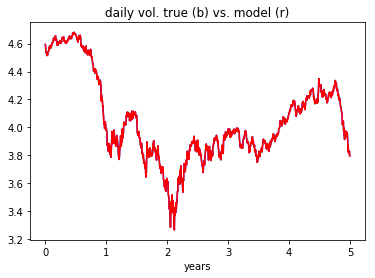

In [15]:
print('ekf. filtering prices')
plt.plot(years[1:], oil[1:],  'b-')
plt.plot(years[1:], ekf_obs, 'r-')
plt.title('daily vol. true (b) vs. model (r)')
plt.xlabel('years')
plt.show()

ekf. filtered vol
# neg vol: 0


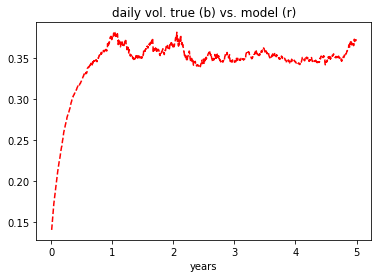

In [16]:
print('ekf. filtered vol')
print("# neg vol:", sum(ekf_vol<0))
plt.plot(years[1:], ekf_vol, 'r--')
plt.title('daily vol. true (b) vs. model (r)')
plt.xlabel('years')
plt.show()

# UKF

In [17]:
ukf_opt = ukf.optimize(init_params, maxiter=maxiter)

[0.0, 4.5005, 0.5005, 0.5005, 0.0, 0.4005]
[0.     4.5005 0.5005 0.5005 0.     0.4005]
[2.5000e-04 4.5005e+00 5.0050e-01 5.0050e-01 0.0000e+00 4.0050e-01]
[0.       4.725525 0.5005   0.5005   0.       0.4005  ]
[0.       4.5005   0.525525 0.5005   0.       0.4005  ]
[0.       4.5005   0.5005   0.525525 0.       0.4005  ]
[0.0000e+00 4.5005e+00 5.0050e-01 5.0050e-01 2.5000e-04 4.0050e-01]
[0.       4.5005   0.5005   0.5005   0.       0.420525]
[8.33333333e-05 4.57550833e+00 4.75475000e-01 5.08841667e-01
 8.33333333e-05 4.07175000e-01]
[1.2500000e-04 4.6130125e+00 4.5045000e-01 5.1301250e-01 1.2500000e-04
 4.1051250e-01]
i: 1
x_i: [1.2500000e-04 4.6130125e+00 4.5045000e-01 5.1301250e-01 1.2500000e-04
 4.1051250e-01]
[1.2500000e-04 4.6130125e+00 4.5045000e-01 5.1301250e-01 1.2500000e-04
 4.1051250e-01]
f_i: -6.022030130451916
[1.25000000e-04 4.61301250e+00 4.83816667e-01 5.13012500e-01
 1.25000000e-04 3.83812500e-01]
i: 2
x_i: [1.2500000e-04 4.6130125e+00 4.5045000e-01 5.1301250e-01 1.250

f_i: -6.472258910640502
[3.53936132e-04 4.56159509e+00 2.29654907e-01 6.18720899e-01
 6.82948328e-04 4.36164844e-01]
[4.63503783e-04 4.53283293e+00 1.94492119e-01 6.36925558e-01
 6.94206780e-04 4.40049507e-01]
i: 23
x_i: [5.25616173e-04 4.48287687e+00 1.33265520e-01 6.73985744e-01
 7.94376413e-04 4.44619777e-01]
[5.25616173e-04 4.48287687e+00 1.33265520e-01 6.73985744e-01
 7.94376413e-04 4.44619777e-01]
f_i: -6.472258910640502
[6.56941443e-04 4.48920925e+00 9.04761934e-02 6.69366227e-01
 9.06742367e-04 4.53724430e-01]
[5.26318122e-04 4.51410789e+00 1.87438958e-01 6.47268092e-01
 6.40455168e-04 4.40146338e-01]
i: 24
x_i: [5.25616173e-04 4.48287687e+00 1.33265520e-01 6.73985744e-01
 7.94376413e-04 4.44619777e-01]
[5.25616173e-04 4.48287687e+00 1.33265520e-01 6.73985744e-01
 7.94376413e-04 4.44619777e-01]
f_i: -6.472258910640502
[6.97152788e-04 4.47254208e+00 1.13392901e-01 6.75790226e-01
 7.46311151e-04 4.49327508e-01]
i: 25
x_i: [5.25616173e-04 4.48287687e+00 1.33265520e-01 6.73985744e-

[7.72536395e-04 4.53907951e+00 1.56597649e-01 7.39071426e-01
 1.42880222e-03 3.71272848e-01]
i: 44
x_i: [7.19534459e-04 4.53572366e+00 1.49135435e-01 7.15274441e-01
 1.22237578e-03 3.95153643e-01]
[7.19534459e-04 4.53572366e+00 1.49135435e-01 7.15274441e-01
 1.22237578e-03 3.95153643e-01]
f_i: -6.479314789200283
[6.64307543e-04 4.53501040e+00 1.35556626e-01 7.18520553e-01
 1.19528489e-03 4.00856499e-01]
[6.55735443e-04 4.53690318e+00 1.29271829e-01 7.39208639e-01
 1.32640019e-03 3.87935902e-01]
i: 45
x_i: [6.55735443e-04 4.53690318e+00 1.29271829e-01 7.39208639e-01
 1.32640019e-03 3.87935902e-01]
[6.55735443e-04 4.53690318e+00 1.29271829e-01 7.39208639e-01
 1.32640019e-03 3.87935902e-01]
f_i: -6.481228546556162
[6.85973986e-04 4.60175086e+00 1.27986584e-01 7.27610841e-01
 1.31378707e-03 3.92417348e-01]
i: 46
x_i: [6.55735443e-04 4.53690318e+00 1.29271829e-01 7.39208639e-01
 1.32640019e-03 3.87935902e-01]
[6.55735443e-04 4.53690318e+00 1.29271829e-01 7.39208639e-01
 1.32640019e-03 3.879

f_i: -6.553190726342928
[1.08931606e-03 4.72127763e+00 1.23635936e-01 1.08201829e+00
 4.35470017e-03 9.16411726e-02]
i: 68
x_i: [ 1.40804449e-03  4.75858804e+00  1.44751533e-01  1.18074324e+00
  5.31942815e-03 -9.91991458e-03]
[ 1.40804449e-03  4.75858804e+00  1.44751533e-01  1.18074324e+00
  5.31942815e-03 -9.91991458e-03]
f_i: -6.553190726342928
[ 1.26725801e-03  4.77104900e+00  1.52848238e-01  1.17386611e+00
  5.25871595e-03 -4.74945184e-03]
i: 69
x_i: [ 1.40804449e-03  4.75858804e+00  1.44751533e-01  1.18074324e+00
  5.31942815e-03 -9.91991458e-03]
[ 1.40804449e-03  4.75858804e+00  1.44751533e-01  1.18074324e+00
  5.31942815e-03 -9.91991458e-03]
f_i: -6.553190726342928
[ 1.44119582e-03  4.73847491e+00  1.63016148e-01  1.19771998e+00
  5.47944631e-03 -3.16136469e-02]
[1.17728600e-03 4.72557695e+00 1.33480989e-01 1.11094372e+00
 4.63588671e-03 6.08274677e-02]
i: 70
x_i: [ 1.40804449e-03  4.75858804e+00  1.44751533e-01  1.18074324e+00
  5.31942815e-03 -9.91991458e-03]
[ 1.40804449e-03

i: 88
x_i: [1.24963245e-03 4.73182381e+00 1.35169553e-01 1.15911904e+00
 5.08315336e-03 1.88993693e-02]
[1.24963245e-03 4.73182381e+00 1.35169553e-01 1.15911904e+00
 5.08315336e-03 1.88993693e-02]
f_i: -6.557286102280262
[1.27860927e-03 4.74053891e+00 1.36060405e-01 1.16758521e+00
 5.17392236e-03 1.01758220e-02]
[1.25506091e-03 4.73523024e+00 1.34384260e-01 1.14990836e+00
 5.00149306e-03 2.63717404e-02]
i: 89
x_i: [1.24963245e-03 4.73182381e+00 1.35169553e-01 1.15911904e+00
 5.08315336e-03 1.88993693e-02]
[1.24963245e-03 4.73182381e+00 1.35169553e-01 1.15911904e+00
 5.08315336e-03 1.88993693e-02]
f_i: -6.557286102280262
[1.31812425e-03 4.73406915e+00 1.37920116e-01 1.15946282e+00
 5.09874814e-03 1.49335751e-02]
[1.29347758e-03 4.73524071e+00 1.36582697e-01 1.15749235e+00
 5.07775270e-03 1.79132826e-02]
i: 90
x_i: [1.24963245e-03 4.73182381e+00 1.35169553e-01 1.15911904e+00
 5.08315336e-03 1.88993693e-02]
[1.24963245e-03 4.73182381e+00 1.35169553e-01 1.15911904e+00
 5.08315336e-03 1.889

f_i: -6.557360312949685
[1.26352787e-03 4.73119235e+00 1.35757958e-01 1.15626959e+00
 5.06307139e-03 2.04446780e-02]
[1.26002299e-03 4.72874933e+00 1.35909215e-01 1.15695047e+00
 5.06874226e-03 2.00636200e-02]
i: 110
x_i: [1.26002299e-03 4.72874933e+00 1.35909215e-01 1.15695047e+00
 5.06874226e-03 2.00636200e-02]
[1.26002299e-03 4.72874933e+00 1.35909215e-01 1.15695047e+00
 5.06874226e-03 2.00636200e-02]
f_i: -6.557379961240175
[1.25190590e-03 4.72925588e+00 1.35538443e-01 1.15545494e+00
 5.05402866e-03 2.16721019e-02]
i: 111
x_i: [1.26002299e-03 4.72874933e+00 1.35909215e-01 1.15695047e+00
 5.06874226e-03 2.00636200e-02]
[1.26002299e-03 4.72874933e+00 1.35909215e-01 1.15695047e+00
 5.06874226e-03 2.00636200e-02]
f_i: -6.557379961240175
[1.26570214e-03 4.73078485e+00 1.35120534e-01 1.15713541e+00
 5.06923015e-03 2.00195588e-02]
i: 112
x_i: [1.26002299e-03 4.72874933e+00 1.35909215e-01 1.15695047e+00
 5.06874226e-03 2.00636200e-02]
[1.26002299e-03 4.72874933e+00 1.35909215e-01 1.1569504

f_i: -6.558176973069459
[1.34151744e-03 4.64654529e+00 1.35777716e-01 1.15965324e+00
 5.10647481e-03 1.95344108e-02]
[1.36991647e-03 4.62755470e+00 1.35118558e-01 1.16034043e+00
 5.11476823e-03 1.93947704e-02]
i: 133
x_i: [1.36991647e-03 4.62755470e+00 1.35118558e-01 1.16034043e+00
 5.11476823e-03 1.93947704e-02]
[1.36991647e-03 4.62755470e+00 1.35118558e-01 1.16034043e+00
 5.11476823e-03 1.93947704e-02]
f_i: -6.558475406798634
[1.36340968e-03 4.62363231e+00 1.35843555e-01 1.16088957e+00
 5.12212191e-03 1.89462214e-02]
[1.40031479e-03 4.59171434e+00 1.35489190e-01 1.16240086e+00
 5.14099651e-03 1.83442804e-02]
i: 134
x_i: [1.40031479e-03 4.59171434e+00 1.35489190e-01 1.16240086e+00
 5.14099651e-03 1.83442804e-02]
[1.40031479e-03 4.59171434e+00 1.35489190e-01 1.16240086e+00
 5.14099651e-03 1.83442804e-02]
f_i: -6.558820347432171
[1.41557318e-03 4.60599678e+00 1.35885253e-01 1.15779380e+00
 5.10634101e-03 2.06087254e-02]
i: 135
x_i: [1.40031479e-03 4.59171434e+00 1.35489190e-01 1.1624008

[0.00634925 1.37685466 0.08909956 1.19521763 0.00611168 0.02056994]
i: 157
x_i: [0.00634925 1.37685466 0.08909956 1.19521763 0.00611168 0.02056994]
[0.00634925 1.37685466 0.08909956 1.19521763 0.00611168 0.02056994]
f_i: -6.590592674652553
[0.00640853 1.32598195 0.08707628 1.193841   0.00610136 0.02352599]
i: 158
x_i: [0.00634925 1.37685466 0.08909956 1.19521763 0.00611168 0.02056994]
[0.00634925 1.37685466 0.08909956 1.19521763 0.00611168 0.02056994]
f_i: -6.590592674652553
[0.00667168 1.13309229 0.08642243 1.20846164 0.00626507 0.01353542]
i: 159
x_i: [0.00634925 1.37685466 0.08909956 1.19521763 0.00611168 0.02056994]
[0.00634925 1.37685466 0.08909956 1.19521763 0.00611168 0.02056994]
f_i: -6.590592674652553
[0.00677329 1.25901933 0.08814947 1.18221318 0.00606394 0.02379903]
[0.00807609 0.55900339 0.0788768  1.17471253 0.00618894 0.0282227 ]
i: 160
x_i: [0.00807609 0.55900339 0.0788768  1.17471253 0.00618894 0.0282227 ]
[0.00807609 0.55900339 0.0788768  1.17471253 0.00618894 0.028222

i: 185
x_i: [0.00828186 0.6109697  0.07881583 1.14515967 0.00597735 0.04237696]
[0.00828186 0.6109697  0.07881583 1.14515967 0.00597735 0.04237696]
f_i: -6.685782905056842
[0.00829192 0.60670373 0.07846766 1.14501745 0.00597654 0.04258864]
[0.00817627 0.66589946 0.07979127 1.14791745 0.00598569 0.04029613]
i: 186
x_i: [0.00828186 0.6109697  0.07881583 1.14515967 0.00597735 0.04237696]
[0.00828186 0.6109697  0.07881583 1.14515967 0.00597735 0.04237696]
f_i: -6.685782905056842
[0.00834059 0.60059217 0.07871408 1.14493794 0.00598233 0.04125456]
i: 187
x_i: [0.00828186 0.6109697  0.07881583 1.14515967 0.00597735 0.04237696]
[0.00828186 0.6109697  0.07881583 1.14515967 0.00597735 0.04237696]
f_i: -6.685782905056842
[0.00835232 0.59365492 0.07849958 1.14377887 0.00597476 0.04226626]
[0.0082077  0.65039812 0.07946921 1.14741747 0.00598543 0.04063972]
i: 188
x_i: [0.00828186 0.6109697  0.07881583 1.14515967 0.00597735 0.04237696]
[0.00828186 0.6109697  0.07881583 1.14515967 0.00597735 0.042376

i: 210
x_i: [0.00831332 0.62143707 0.07862006 1.14042371 0.00594193 0.04469822]
[0.00831332 0.62143707 0.07862006 1.14042371 0.00594193 0.04469822]
f_i: -6.687162722129199
[0.00831123 0.62046034 0.07855593 1.14085632 0.00594499 0.04450774]
i: 211
x_i: [0.00831332 0.62143707 0.07862006 1.14042371 0.00594193 0.04469822]
[0.00831332 0.62143707 0.07862006 1.14042371 0.00594193 0.04469822]
f_i: -6.687162722129199
[0.00831261 0.62251859 0.07855887 1.14049446 0.00594209 0.04464514]
i: 212
x_i: [0.00831332 0.62143707 0.07862006 1.14042371 0.00594193 0.04469822]
[0.00831332 0.62143707 0.07862006 1.14042371 0.00594193 0.04469822]
f_i: -6.687162722129199
[0.0083158  0.62265872 0.07860275 1.14011166 0.00593958 0.04481507]
[0.00832291 0.62468021 0.07861673 1.13909445 0.00593222 0.04528337]
i: 213
x_i: [0.00832291 0.62468021 0.07861673 1.13909445 0.00593222 0.04528337]
[0.00832291 0.62468021 0.07861673 1.13909445 0.00593222 0.04528337]
f_i: -6.687411906753518
[0.0083217  0.62352138 0.0785905  1.1392

f_i: -6.691991686903516
[0.00859926 0.68404724 0.07915557 1.09902432 0.00564369 0.06484042]
i: 241
x_i: [0.00855317 0.67404024 0.07909937 1.10575087 0.00569227 0.06153088]
[0.00855317 0.67404024 0.07909937 1.10575087 0.00569227 0.06153088]
f_i: -6.691991686903516
[0.00858059 0.67964235 0.07923368 1.10179777 0.00566414 0.06342499]
[0.00859298 0.68260808 0.07937408 1.1000188  0.00565172 0.06421088]
i: 242
x_i: [0.00858059 0.67964235 0.07923368 1.10179777 0.00566414 0.06342499]
[0.00858059 0.67964235 0.07923368 1.10179777 0.00566414 0.06342499]
f_i: -6.692039378979877
[0.00855496 0.67568096 0.07915569 1.10530921 0.00568903 0.06171005]
[0.00857465 0.67754383 0.0791001  1.10270177 0.00567033 0.06307678]
i: 243
x_i: [0.00858059 0.67964235 0.07923368 1.10179777 0.00566414 0.06342499]
[0.00858059 0.67964235 0.07923368 1.10179777 0.00566414 0.06342499]
f_i: -6.692039378979877
[0.00855128 0.67372949 0.07916337 1.10599573 0.00569425 0.06137944]
i: 244
x_i: [0.00858059 0.67964235 0.07923368 1.1017

[0.00860459 0.65161262 0.08269157 1.10058282 0.00567188 0.06314153]
i: 270
x_i: [0.00860459 0.65161262 0.08269157 1.10058282 0.00567188 0.06314153]
[0.00860459 0.65161262 0.08269157 1.10058282 0.00567188 0.06314153]
f_i: -6.693879588537253
[0.00861333 0.65716127 0.08251432 1.09918964 0.00566073 0.06378268]
[0.00863858 0.6550379  0.08353548 1.0961224  0.00564312 0.06495136]
i: 271
x_i: [0.00863858 0.6550379  0.08353548 1.0961224  0.00564312 0.06495136]
[0.00863858 0.6550379  0.08353548 1.0961224  0.00564312 0.06495136]
f_i: -6.69417187130117
[0.00857135 0.64640657 0.08274342 1.10532274 0.00570617 0.0606937 ]
[0.0085504  0.6356691  0.08358211 1.10877217 0.00573492 0.05872126]
i: 272
x_i: [0.0085504  0.6356691  0.08358211 1.10877217 0.00573492 0.05872126]
[0.0085504  0.6356691  0.08358211 1.10877217 0.00573492 0.05872126]
f_i: -6.69458633596557
[0.00856024 0.63383745 0.08371521 1.10758098 0.00572728 0.05936578]
i: 273
x_i: [0.0085504  0.6356691  0.08358211 1.10877217 0.00573492 0.05872126

[0.00855    0.60742806 0.0872119  1.11062753 0.00576478 0.05671488]
i: 298
x_i: [0.00855663 0.61145365 0.08687897 1.10951657 0.00575523 0.05735931]
[0.00855663 0.61145365 0.08687897 1.10951657 0.00575523 0.05735931]
f_i: -6.695120390401789
[0.00855376 0.61487321 0.08631328 1.10962732 0.0057535  0.05749906]
[0.00854777 0.60705573 0.08720884 1.11096512 0.00576721 0.05653965]
i: 299
x_i: [0.00854777 0.60705573 0.08720884 1.11096512 0.00576721 0.05653965]
[0.00854777 0.60705573 0.08720884 1.11096512 0.00576721 0.05653965]
f_i: -6.695123231480467
[0.00855703 0.6086504  0.08724528 1.10962025 0.00575763 0.05720628]
[0.00854712 0.60948895 0.08686162 1.11088371 0.00576506 0.05669111]
i: 300
x_i: [0.00854777 0.60705573 0.08720884 1.11096512 0.00576721 0.05653965]
[0.00854777 0.60705573 0.08720884 1.11096512 0.00576721 0.05653965]
f_i: -6.695123231480467
[0.00855535 0.60826308 0.08722501 1.10990421 0.00575964 0.05706619]
[0.00854827 0.60955758 0.08689193 1.11071601 0.00576397 0.05676708]
i: 301
x

f_i: -6.695125468689662
[0.00855104 0.60869096 0.08708849 1.11046153 0.00576303 0.05681636]
[0.00855132 0.60880051 0.08708479 1.11043019 0.00576279 0.05682859]
i: 327
x_i: [0.00855104 0.60869096 0.08708849 1.11046153 0.00576303 0.05681636]
[0.00855104 0.60869096 0.08708849 1.11046153 0.00576303 0.05681636]
f_i: -6.695125678178515
[0.00854867 0.60817907 0.08708642 1.11080061 0.00576548 0.05665104]
i: 328
x_i: [0.00855104 0.60869096 0.08708849 1.11046153 0.00576303 0.05681636]
[0.00855104 0.60869096 0.08708849 1.11046153 0.00576303 0.05681636]
f_i: -6.695125678178515
[0.00854974 0.60747114 0.08721077 1.11071434 0.00576542 0.05665288]
i: 329
x_i: [0.00855104 0.60869096 0.08708849 1.11046153 0.00576303 0.05681636]
[0.00855104 0.60869096 0.08708849 1.11046153 0.00576303 0.05681636]
f_i: -6.695125678178515
[0.00854994 0.60831814 0.08709701 1.11062468 0.00576426 0.05673653]
[0.00854978 0.60838894 0.08707649 1.11064329 0.00576431 0.05673473]
i: 330
x_i: [0.00854994 0.60831814 0.08709701 1.1106

i: 357
x_i: [0.00855265 0.60915192 0.08703061 1.1103614  0.00576216 0.05685178]
[0.00855265 0.60915192 0.08703061 1.1103614  0.00576216 0.05685178]
f_i: -6.6951336132135415
[0.00855792 0.60990025 0.08707478 1.10966473 0.00575734 0.05717221]
[0.00855978 0.610329   0.08705659 1.10943842 0.00575565 0.05727967]
i: 358
x_i: [0.00855978 0.610329   0.08705659 1.10943842 0.00575565 0.05727967]
[0.00855978 0.610329   0.08705659 1.10943842 0.00575565 0.05727967]
f_i: -6.695134610518508
[0.00855785 0.61026388 0.08701202 1.10967468 0.00575715 0.05718223]
[0.00855896 0.61085002 0.08694573 1.10954194 0.00575594 0.05725817]
i: 359
x_i: [0.00855896 0.61085002 0.08694573 1.10954194 0.00575594 0.05725817]
[0.00855896 0.61085002 0.08694573 1.10954194 0.00575594 0.05725817]
f_i: -6.695135636145838
[0.00855866 0.609658   0.08710957 1.10964808 0.00575742 0.05715475]
[0.00856006 0.6094942  0.0871535  1.10954185 0.0057569  0.05717815]
i: 360
x_i: [0.00856006 0.6094942  0.0871535  1.10954185 0.0057569  0.05717

f_i: -6.695239508917631
[0.00860209 0.60265267 0.08775376 1.11017465 0.00576842 0.05533277]
i: 388
x_i: [0.00862274 0.60867918 0.08721923 1.10821271 0.00575267 0.05620633]
[0.00862274 0.60867918 0.08721923 1.10821271 0.00575267 0.05620633]
f_i: -6.695239508917631
[0.00862398 0.60369727 0.0879498  1.10839398 0.00575725 0.05587749]
i: 389
x_i: [0.00862274 0.60867918 0.08721923 1.10821271 0.00575267 0.05620633]
[0.00862274 0.60867918 0.08721923 1.10821271 0.00575267 0.05620633]
f_i: -6.695239508917631
[0.00862613 0.60507943 0.08776977 1.10826714 0.00575569 0.05593641]
[0.00864475 0.60430048 0.08799229 1.10753106 0.00575257 0.05583575]
i: 390
x_i: [0.00864475 0.60430048 0.08799229 1.10753106 0.00575257 0.05583575]
[0.00864475 0.60430048 0.08799229 1.10753106 0.00575257 0.05583575]
f_i: -6.695251067894718
[0.0086373  0.60614277 0.08750982 1.10831573 0.00575608 0.05562324]
[0.0086587  0.60658635 0.08742144 1.1078982  0.00575446 0.0552863 ]
i: 391
x_i: [0.0086587  0.60658635 0.08742144 1.1078

i: 415
x_i: [0.0087438  0.61089027 0.0875307  1.1032879  0.00572656 0.05591071]
[0.0087438  0.61089027 0.0875307  1.1032879  0.00572656 0.05591071]
f_i: -6.703779555534557
[0.00871124 0.61012214 0.08738479 1.10489898 0.0057356  0.05580527]
[0.00869561 0.61082128 0.08727956 1.10524276 0.00573639 0.05606099]
i: 416
x_i: [0.0087438  0.61089027 0.0875307  1.1032879  0.00572656 0.05591071]
[0.0087438  0.61089027 0.0875307  1.1032879  0.00572656 0.05591071]
f_i: -6.703779555534557
[0.00870799 0.60811318 0.08762703 1.10530787 0.00573951 0.05555606]
[0.0086976  0.61140539 0.08721043 1.1050935  0.00573512 0.05612289]
[0.00871359 0.60929966 0.0874719  1.10502223 0.00573716 0.05562557]
[0.00871938 0.61084325 0.08741063 1.10426001 0.00573142 0.05599837]
[0.00871865 0.61093005 0.08740425 1.10425142 0.00573126 0.056028  ]
[0.00871948 0.61077576 0.08741739 1.10427166 0.00573155 0.05598548]
[0.00871971 0.61085578 0.08740513 1.10426533 0.00573147 0.05598585]
[0.00871897 0.61169653 0.08730113 1.10415497

f_i: -6.70502986962187
[0.00874427 0.61086626 0.08753676 1.10327084 0.0057265  0.05590685]
[0.00874289 0.61082464 0.08753024 1.10334565 0.00572693 0.05589803]
i: 439
x_i: [0.00874353 0.61086937 0.08753116 1.10330401 0.00572667 0.05590748]
[0.00874353 0.61086937 0.08753116 1.10330401 0.00572667 0.05590748]
f_i: -6.70502986962187
[0.00874378 0.61078402 0.08753842 1.10332097 0.00572685 0.05588636]
[0.00874313 0.61085294 0.08753012 1.10332531 0.00572679 0.05590499]
i: 440
x_i: [0.00874353 0.61086937 0.08753116 1.10330401 0.00572667 0.05590748]
[0.00874353 0.61086937 0.08753116 1.10330401 0.00572667 0.05590748]
f_i: -6.70502986962187
[0.00874388 0.61084473 0.08753551 1.10329529 0.00572665 0.05590184]
[0.00874314 0.61082966 0.08753155 1.10333306 0.00572686 0.05589898]
i: 441
x_i: [0.00874353 0.61086937 0.08753116 1.10330401 0.00572667 0.05590748]
[0.00874353 0.61086937 0.08753116 1.10330401 0.00572667 0.05590748]
f_i: -6.70502986962187
[0.00874315 0.61080795 0.08753495 1.10333386 0.00572688 

In [18]:
print("Init Params: {}".format(init_params))
print("EKF Opt Params: {}".format(ekf_opt))
print("UKF Opt Params: {}".format(ukf_opt))

Init Params: [0.0, 4.5005, 0.5005, 0.5005, 0.0, 0.4005]
EKF Opt Params: [ 1.01401270e-02  4.05517861e+00  3.56331950e-01  1.00000009e+00
 -3.04613819e-03  1.36804051e-01]
UKF Opt Params: [0.00874331 0.61083811 0.08753243 1.10332178 0.00572679 0.05590131]


In [19]:
ukf_obs, ukf_vol = ekf.filter(oil, ukf_opt)

params: [0.00874331436046263, 0.6108381139458515, 0.08753243358624391, 0.8966782223012517, 0.005726790089885275, 0.05590130718728077]


ekf. filtering prices


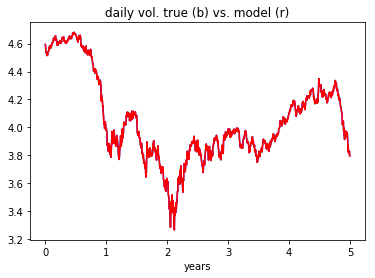

In [20]:
print('ekf. filtering prices')
plt.plot(years[1:], oil[1:],  'b-')
plt.plot(years[1:], ukf_obs, 'r-')
plt.title('daily vol. true (b) vs. model (r)')
plt.xlabel('years')
plt.show()

ukf. filtered vol
# neg vol: 0


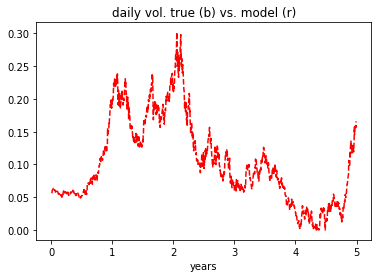

In [21]:
print('ukf. filtered vol')
print("# neg vol:", sum(ukf_vol<0))
plt.plot(years[1:], ukf_vol, 'r--')
plt.title('daily vol. true (b) vs. model (r)')
plt.xlabel('years')
plt.show()

# Particle Filter Heston

In [156]:
v0 = ukf_opt[-1] # use ukf v0
pf_bounds = list(bounds)
pf_bounds[-1] = v0
pf_vol, param_steps = pf_heston.filter(pf_bounds, predict_obs=False)

resampling since: 1162.574132736375
resampling since: 1202.920919951599
resampling since: 122.49602818466694
resampling since: 58.22020818863559
resampling since: 1002.4614990610313
resampling since: 1023.2677295242594
resampling since: 1352.0106198728806
resampling since: 1379.050070051747
resampling since: 1286.0987187694795
resampling since: 1064.0688388846943
resampling since: 1301.4922951594808
resampling since: 756.4622004264158
resampling since: 409.8797271353769
resampling since: 1101.3513775376925
resampling since: 1162.7391640910118
resampling since: 823.9242678864605
resampling since: 1169.540932856429
resampling since: 56.48069973512841
resampling since: 1237.2655422235837
resampling since: 929.0763735674989
resampling since: 1220.8942997277761
resampling since: 1026.5836559926117
resampling since: 1326.5930001659149
resampling since: 423.3349029274043
resampling since: 1365.8601244934816
resampling since: 1035.4624693867088
resampling since: 1386.9394551626056
resampling s

resampling since: 1392.3586461605394
resampling since: 1308.14824978334
resampling since: 1285.1502350019043
resampling since: 57.75544225162463
resampling since: 1346.9302220559593
resampling since: 1083.0616528497471
resampling since: 503.8758577853721
resampling since: 1296.8582336586774
resampling since: 1238.6106581048411
resampling since: 1056.447245246027
resampling since: 955.6265092800727
resampling since: 1195.297010592269
resampling since: 971.9925844331345
resampling since: 1354.2756992006964
resampling since: 1341.4003624929344
resampling since: 523.7732471910123
resampling since: 1173.5457520313294
resampling since: 433.72015337157166
resampling since: 1356.243950349362
resampling since: 1113.1115734724228
resampling since: 1189.5379692116996
resampling since: 556.3949573576326
resampling since: 1084.4936609718577
resampling since: 1091.2797469465586
resampling since: 1379.3070682642604
resampling since: 1291.5907460371848
resampling since: 822.1129097482376
resampling si

pf filtered vol


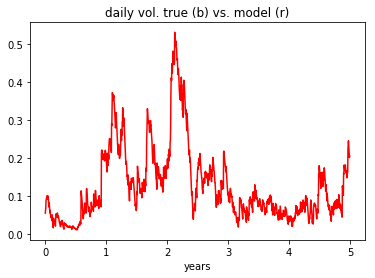

In [157]:
print('pf filtered vol')
plt.plot(years[:], pf_vol[:], 'r-')
plt.title('daily vol. true (b) vs. model (r)')
plt.xlabel('years')
plt.show()

pf filtered vol


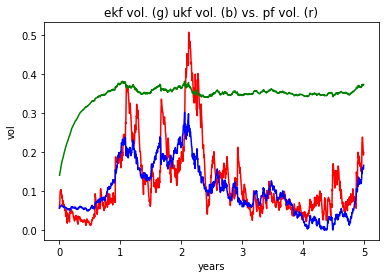

In [83]:
print('pf filtered vol')
plt.plot(years[:], pf_vol[:], 'r-')
plt.plot(years[1:], ukf_vol, 'b-')
plt.plot(years[1:], ekf_vol, 'g-')
plt.title('ekf vol. (g) ukf vol. (b) vs. pf vol. (r)')
plt.xlabel('years')
plt.ylabel('vol')
# plt.savefig('./report/figs/oil_filtered_heston')
plt.show()

In [67]:
param_steps.transpose()[-1]

array([-0.04916675,  4.96244348,  0.0698727 ,  0.75848864, -0.34307278])

# Particle Filter VGSA

In [68]:
log_return_oil = oil[1:]/oil[:-1]

In [69]:
ukf_opt

array([0.00874331, 0.61083811, 0.08753243, 1.10332178, 0.00572679,
       0.05590131])

In [70]:
param_steps.transpose()[-1]

array([-0.04916675,  4.96244348,  0.0698727 ,  0.75848864, -0.34307278])

In [71]:
reload(pf)

<module 'filtering.filtering.particle_filter' from '/Users/Mason/Desktop/Columbia/computational-methods-in-finance/cfinance-filtering/filtering/filtering/particle_filter.py'>

In [72]:
mu_ = (-0.2, 0.2)
kappa_ = (1, 3) # mean reversion rate
theta_ = (0.01, 0.4)
sigma_ = (0.1, 1.5)
nu_ = (0.2, 0.6)
eta_ = (1,5) # long-term rate of change
lda_ = (5,10) # time change vol

vgsa_bounds = [mu_, kappa_, theta_, sigma_, nu_, eta_, lda_]

In [73]:
pf_vgsa = pf.PFVGSA(N=num_particles, dt=dt)
arrivals, param_steps = pf_vgsa.filter_arrival(log_return_oil, vgsa_bounds, is_bounds=True)

num neg. arrival rate: 4
resampling since: 7.6591253718469146
num neg. arrival rate: 300
resampling since: 61.39492496404548
num neg. arrival rate: 380
resampling since: 34.26630474979392
num neg. arrival rate: 298
resampling since: 107.51081564188421
num neg. arrival rate: 437
resampling since: 1.3557048336908262
num neg. arrival rate: 39
resampling since: 1122.454682401618
num neg. arrival rate: 653
resampling since: 90.11503390437586
num neg. arrival rate: 437
resampling since: 17.78221629769237
num neg. arrival rate: 339
resampling since: 10.116246200257807
num neg. arrival rate: 295
resampling since: 193.5338294630252
num neg. arrival rate: 525
resampling since: 48.44064845737269
num neg. arrival rate: 353
resampling since: 77.15572106901129
num neg. arrival rate: 389
resampling since: 8.778869511366356
num neg. arrival rate: 256
resampling since: 97.6821854708638
num neg. arrival rate: 492
resampling since: 15.306731615580567
num neg. arrival rate: 310
resampling since: 52.042880

resampling since: 43.91245859811715
num neg. arrival rate: 419
resampling since: 59.96701114336971
num neg. arrival rate: 437
resampling since: 18.835254485933834
num neg. arrival rate: 280
resampling since: 86.85966777740884
num neg. arrival rate: 455
resampling since: 46.5032672762442
num neg. arrival rate: 351
resampling since: 8.914880597093264
num neg. arrival rate: 342
resampling since: 36.06485387668886
num neg. arrival rate: 416
resampling since: 15.753316167118316
num neg. arrival rate: 335
resampling since: 61.73069552423792
num neg. arrival rate: 480
resampling since: 128.0356018469471
num neg. arrival rate: 483
resampling since: 80.13888798494885
num neg. arrival rate: 436
resampling since: 18.00206964409214
num neg. arrival rate: 284
resampling since: 146.0194898856444
num neg. arrival rate: 474
resampling since: 15.985531286097105
num neg. arrival rate: 268
resampling since: 104.52639237810251
num neg. arrival rate: 545
resampling since: 25.989994747923316
num neg. arriva

resampling since: 134.30900696790695
num neg. arrival rate: 446
resampling since: 49.50761351264256
num neg. arrival rate: 351
resampling since: 15.102235571628176
num neg. arrival rate: 331
resampling since: 87.11400381976435
num neg. arrival rate: 444
resampling since: 19.938333020223855
num neg. arrival rate: 293
resampling since: 6.787319615958443
num neg. arrival rate: 324
resampling since: 64.54559324341662
num neg. arrival rate: 465
resampling since: 8.088744957943502
num neg. arrival rate: 186
resampling since: 198.9378910997938
num neg. arrival rate: 533
resampling since: 16.966912293951765
num neg. arrival rate: 315
resampling since: 11.773545284924186
num neg. arrival rate: 290
resampling since: 46.43777712163726
num neg. arrival rate: 453
resampling since: 108.6985590767116
num neg. arrival rate: 440
resampling since: 16.134819198202255
num neg. arrival rate: 302
resampling since: 168.72626370775058
num neg. arrival rate: 464
resampling since: 86.59337642476115
num neg. arr

num neg. arrival rate: 169
resampling since: 11.58922047253009
num neg. arrival rate: 270
resampling since: 36.244009037768535
num neg. arrival rate: 446
resampling since: 10.58223909622651
num neg. arrival rate: 334
resampling since: 21.10476812132146
num neg. arrival rate: 392
resampling since: 24.711578128427394
num neg. arrival rate: 321
resampling since: 21.987775300049123
num neg. arrival rate: 365
resampling since: 23.189783764879884
num neg. arrival rate: 362
resampling since: 4.928343928774144
num neg. arrival rate: 195
resampling since: 388.4178922379535
num neg. arrival rate: 582
resampling since: 75.12802790509652
num neg. arrival rate: 384
resampling since: 28.974504126863618
num neg. arrival rate: 355
resampling since: 7.043767884481808
num neg. arrival rate: 243
resampling since: 80.20566064225679
num neg. arrival rate: 492
resampling since: 9.77990252010971
num neg. arrival rate: 341
resampling since: 8.462603670633095
num neg. arrival rate: 313
resampling since: 85.684

num neg. arrival rate: 180
resampling since: 378.6107215452271
num neg. arrival rate: 569
resampling since: 31.106994373186748
num neg. arrival rate: 298
resampling since: 263.2422576962855
num neg. arrival rate: 523
resampling since: 2.2215483017076787
num neg. arrival rate: 29
resampling since: 474.51965710609244
num neg. arrival rate: 638
resampling since: 36.99977139736379
num neg. arrival rate: 370
resampling since: 12.46812003106049
num neg. arrival rate: 324
resampling since: 29.520912623203426
num neg. arrival rate: 412
resampling since: 6.398588459376632
num neg. arrival rate: 217
resampling since: 292.21117126510103
num neg. arrival rate: 574
resampling since: 18.4085123802876
num neg. arrival rate: 320
resampling since: 166.44370682487113
num neg. arrival rate: 483
resampling since: 115.27402562582952
num neg. arrival rate: 441
resampling since: 108.16906982793418
num neg. arrival rate: 426
resampling since: 21.614611590341028
num neg. arrival rate: 357
resampling since: 194

resampling since: 46.96679530941473
num neg. arrival rate: 436
resampling since: 9.144455535384099
num neg. arrival rate: 289
resampling since: 62.763793051575725
num neg. arrival rate: 438
resampling since: 68.84004137236664
num neg. arrival rate: 393
resampling since: 29.37302099350322
num neg. arrival rate: 374
resampling since: 17.29300078847428
num neg. arrival rate: 359
resampling since: 5.066763927263565
num neg. arrival rate: 198
resampling since: 125.02220269067729
num neg. arrival rate: 551
resampling since: 8.990117512619948
num neg. arrival rate: 281
resampling since: 231.93858954260372
num neg. arrival rate: 547
resampling since: 48.61922075660694
num neg. arrival rate: 372
resampling since: 63.738470173237076
num neg. arrival rate: 393
resampling since: 22.368349108530836
num neg. arrival rate: 327
resampling since: 28.537520506084803
num neg. arrival rate: 351
resampling since: 38.07328208477605
num neg. arrival rate: 420
resampling since: 132.6368280837228
num neg. arri

num neg. arrival rate: 441
resampling since: 58.39559965530898
num neg. arrival rate: 370
resampling since: 125.56740695883924
num neg. arrival rate: 457
resampling since: 165.37995420142488
num neg. arrival rate: 438
resampling since: 44.982036764540126
num neg. arrival rate: 341
resampling since: 41.612610639356795
num neg. arrival rate: 426
resampling since: 254.08009386569856
num neg. arrival rate: 547
resampling since: 39.74302961414059
num neg. arrival rate: 290
resampling since: 22.90925880971575
num neg. arrival rate: 367
resampling since: 3.929906295474473
num neg. arrival rate: 261
resampling since: 337.6433772063868
num neg. arrival rate: 570
resampling since: 9.959549993300984
num neg. arrival rate: 259
resampling since: 142.41206791650828
num neg. arrival rate: 553
resampling since: 75.3737768554143
num neg. arrival rate: 443
resampling since: 28.965374164985942
num neg. arrival rate: 361
resampling since: 6.241769551311882
num neg. arrival rate: 245
resampling since: 196.

resampling since: 2.520652453866149
num neg. arrival rate: 173
resampling since: 286.7862906179063
num neg. arrival rate: 577
resampling since: 147.85413436782449
num neg. arrival rate: 464
resampling since: 25.53685104624489
num neg. arrival rate: 276
resampling since: 46.12153856413278
num neg. arrival rate: 405
resampling since: 19.033514905995403
num neg. arrival rate: 285
resampling since: 150.7927013527082
num neg. arrival rate: 509
resampling since: 30.585076687620333
num neg. arrival rate: 345
resampling since: 64.31065100162083
num neg. arrival rate: 413
resampling since: 57.85300631728128
num neg. arrival rate: 424
resampling since: 16.251530584718715
num neg. arrival rate: 241
resampling since: 7.648051415927789
num neg. arrival rate: 336
resampling since: 51.65726051291839
num neg. arrival rate: 407
resampling since: 12.955978316587139
num neg. arrival rate: 384
resampling since: 37.476982974456945
num neg. arrival rate: 351
resampling since: 46.440938309099664
num neg. arr

resampling since: 108.23967170815409
num neg. arrival rate: 414
resampling since: 108.42810836004891
num neg. arrival rate: 445
resampling since: 89.08286492225753
num neg. arrival rate: 454
resampling since: 248.5538548122726
num neg. arrival rate: 455
resampling since: 128.220428312732
num neg. arrival rate: 409
resampling since: 2.2227292945957107
num neg. arrival rate: 100
resampling since: 695.008506664844
num neg. arrival rate: 600
resampling since: 40.61856125404895
num neg. arrival rate: 299
resampling since: 79.82505200757083
num neg. arrival rate: 463
resampling since: 74.49523835632334
num neg. arrival rate: 452
resampling since: 23.06315371278565
num neg. arrival rate: 294
resampling since: 17.959945768774322
num neg. arrival rate: 432
resampling since: 2.1618549392446083
num neg. arrival rate: 136
resampling since: 434.8476024532883
num neg. arrival rate: 585
resampling since: 2.557271437393216
num neg. arrival rate: 228
resampling since: 313.92605873538474
num neg. arriva

num neg. arrival rate: 456
resampling since: 66.36164652842653
num neg. arrival rate: 462
resampling since: 11.917388094542398
num neg. arrival rate: 354
resampling since: 39.58179416714961
num neg. arrival rate: 405
resampling since: 31.124845596505637
num neg. arrival rate: 311
resampling since: 159.58700866324855
num neg. arrival rate: 484
resampling since: 107.40351926324024
num neg. arrival rate: 409
resampling since: 237.5471813294979
num neg. arrival rate: 502
resampling since: 30.52171894159189
num neg. arrival rate: 354
resampling since: 6.43434998418247
num neg. arrival rate: 241
resampling since: 56.49891904120517
num neg. arrival rate: 460
resampling since: 24.254633840892026
num neg. arrival rate: 351
resampling since: 134.99801098206743
num neg. arrival rate: 460
resampling since: 70.88243367011631
num neg. arrival rate: 410
resampling since: 7.408629713622847
num neg. arrival rate: 218
resampling since: 29.922472653663327
num neg. arrival rate: 457
resampling since: 15.0

In [75]:
arrivals

array([2.72666857, 0.48223516, 0.03982893, ..., 0.00761066, 0.01370615,
       0.00716663])

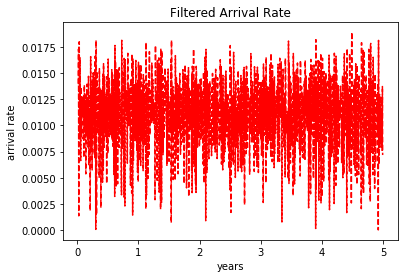

In [76]:
plt.plot(years[4:], arrivals[3:], 'r--')
plt.title('Filtered Arrival Rate')
plt.xlabel('years')
plt.ylabel('arrival rate')
plt.savefig('./report/figs/oil_filtered_rate')
plt.show()

In [77]:
param_steps.transpose()[-1]

array([0.05792065, 2.63333272, 0.27264651, 0.62611706, 0.27734236,
       1.73151978, 9.28288038])

## Filtering SNP

In [55]:
snp = np.log(snp.as_matrix())
snp_return = snp[1:]/snp[:-1]

/Users/Mason/Desktop/Columbia/computational-methods-in-finance/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [115]:
maxiter=1000
ekf_snp = kf.EKFHeston(snp, dt=dt, bounds=bounds, is_log=True)
ukf_snp = kf.UKFHeston(snp, dt=dt, bounds=bounds, is_log=True)

num_particles = 2000
pf_heston_snp = pf.PFHeston(snp, dt=dt, N=num_particles, is_log=True)

In [116]:
ekf_snp_opt = ekf_snp.optimize(init_params, maxiter=maxiter)

i: 1
x_i: [1.2500000e-04 4.6130125e+00 5.1301250e-01 5.1301250e-01 1.2500000e-04
 3.6045000e-01]
f_i: -6.3159093581299555
i: 2
x_i: [1.2500000e-04 4.6130125e+00 5.1301250e-01 5.1301250e-01 1.2500000e-04
 3.6045000e-01]
f_i: -6.3159093581299555
i: 3
x_i: [1.2500000e-04 4.6130125e+00 5.1301250e-01 5.1301250e-01 1.2500000e-04
 3.6045000e-01]
f_i: -6.3159093581299555
i: 4
x_i: [1.2500000e-04 4.6130125e+00 5.1301250e-01 5.1301250e-01 1.2500000e-04
 3.6045000e-01]
f_i: -6.3159093581299555
i: 5
x_i: [1.2500000e-04 4.6130125e+00 5.1301250e-01 5.1301250e-01 1.2500000e-04
 3.6045000e-01]
f_i: -6.3159093581299555
i: 6
x_i: [5.92592593e-04 4.68385370e+00 4.90613580e-01 5.07914815e-01
 3.00925926e-04 3.37211111e-01]
f_i: -6.366867008465634
i: 7
x_i: [5.92592593e-04 4.68385370e+00 4.90613580e-01 5.07914815e-01
 3.00925926e-04 3.37211111e-01]
f_i: -6.366867008465634
i: 8
x_i: [5.81018519e-04 4.58592616e+00 5.32862577e-01 4.84048380e-01
 2.89351852e-04 3.07297222e-01]
f_i: -6.4358996278103415
i: 9
x_i

f_i: -7.023073179039145
i: 66
x_i: [1.79010122e-03 5.37808071e+00 5.47018085e-01 5.09822741e-01
 6.78060721e-04 8.25654815e-02]
f_i: -7.0230934037797335
i: 67
x_i: [1.80676804e-03 5.38746080e+00 5.46114070e-01 5.10931136e-01
 6.77472662e-04 8.19264321e-02]
f_i: -7.023127994695721
i: 68
x_i: [1.80676804e-03 5.38746080e+00 5.46114070e-01 5.10931136e-01
 6.77472662e-04 8.19264321e-02]
f_i: -7.023127994695721
i: 69
x_i: [1.80676804e-03 5.38746080e+00 5.46114070e-01 5.10931136e-01
 6.77472662e-04 8.19264321e-02]
f_i: -7.023127994695721
i: 70
x_i: [1.81799295e-03 5.41320053e+00 5.42109473e-01 5.16542157e-01
 7.11757481e-04 8.16468198e-02]
f_i: -7.023161088514796
i: 71
x_i: [1.81616742e-03 5.45373799e+00 5.36500580e-01 5.18511795e-01
 7.33705987e-04 8.17977860e-02]
f_i: -7.023222784586341
i: 72
x_i: [1.81616742e-03 5.45373799e+00 5.36500580e-01 5.18511795e-01
 7.33705987e-04 8.17977860e-02]
f_i: -7.023222784586341
i: 73
x_i: [1.81616742e-03 5.45373799e+00 5.36500580e-01 5.18511795e-01
 7.3370

f_i: -7.025638707088614
i: 129
x_i: [ 3.80092226e-03  9.60705047e+00 -6.81146342e-02  1.09591490e+00
  3.98337435e-03  8.18091179e-02]
f_i: -7.025638819003307
i: 130
x_i: [ 3.80092226e-03  9.60705047e+00 -6.81146342e-02  1.09591490e+00
  3.98337435e-03  8.18091179e-02]
f_i: -7.025638819003307
i: 131
x_i: [ 3.80092226e-03  9.60705047e+00 -6.81146342e-02  1.09591490e+00
  3.98337435e-03  8.18091179e-02]
f_i: -7.025638819003307
i: 132
x_i: [ 3.80092226e-03  9.60705047e+00 -6.81146342e-02  1.09591490e+00
  3.98337435e-03  8.18091179e-02]
f_i: -7.025638819003307
i: 133
x_i: [ 3.78834628e-03  9.58677206e+00 -6.51206849e-02  1.09296757e+00
  3.96853062e-03  8.17598776e-02]
f_i: -7.025638845434284
i: 134
x_i: [ 3.80713558e-03  9.61899387e+00 -6.98750927e-02  1.09784542e+00
  3.99356770e-03  8.17815253e-02]
f_i: -7.025638868119477
i: 135
x_i: [ 3.80713558e-03  9.61899387e+00 -6.98750927e-02  1.09784542e+00
  3.99356770e-03  8.17815253e-02]
f_i: -7.025638868119477
i: 136
x_i: [ 3.79972357e-03  9

f_i: -7.025638941965497
i: 190
x_i: [ 3.79775755e-03  9.59972652e+00 -6.72159805e-02  1.09623139e+00
  3.98413143e-03  8.17726227e-02]
f_i: -7.025638944719645
i: 191
x_i: [ 3.79775755e-03  9.59972652e+00 -6.72159805e-02  1.09623139e+00
  3.98413143e-03  8.17726227e-02]
f_i: -7.025638944719645
i: 192
x_i: [ 3.79709591e-03  9.59886744e+00 -6.71023637e-02  1.09621150e+00
  3.98399182e-03  8.17698740e-02]
f_i: -7.025638944945103
i: 193
x_i: [ 3.79941278e-03  9.60178251e+00 -6.76354385e-02  1.09737009e+00
  3.98964016e-03  8.17689889e-02]
f_i: -7.025638958943229
i: 194
x_i: [ 3.79941278e-03  9.60178251e+00 -6.76354385e-02  1.09737009e+00
  3.98964016e-03  8.17689889e-02]
f_i: -7.025638958943229
i: 195
x_i: [ 3.79941278e-03  9.60178251e+00 -6.76354385e-02  1.09737009e+00
  3.98964016e-03  8.17689889e-02]
f_i: -7.025638958943229
i: 196
x_i: [ 3.79941278e-03  9.60178251e+00 -6.76354385e-02  1.09737009e+00
  3.98964016e-03  8.17689889e-02]
f_i: -7.025638958943229
i: 197
x_i: [ 3.79941278e-03  9

f_i: -7.02564455095074
i: 251
x_i: [ 4.12026973e-03  8.89297440e+00 -7.06577836e-02  1.74184563e+00
  6.84833148e-03  8.17299729e-02]
f_i: -7.025644688810491
i: 252
x_i: [ 4.12026973e-03  8.89297440e+00 -7.06577836e-02  1.74184563e+00
  6.84833148e-03  8.17299729e-02]
f_i: -7.025644688810491
i: 253
x_i: [ 4.12026973e-03  8.89297440e+00 -7.06577836e-02  1.74184563e+00
  6.84833148e-03  8.17299729e-02]
f_i: -7.025644688810491
i: 254
x_i: [ 4.16215913e-03  8.74170042e+00 -6.73678517e-02  1.85194817e+00
  7.33283681e-03  8.17279659e-02]
f_i: -7.025644816051231
i: 255
x_i: [ 4.16215913e-03  8.74170042e+00 -6.73678517e-02  1.85194817e+00
  7.33283681e-03  8.17279659e-02]
f_i: -7.025644816051231
i: 256
x_i: [ 4.16215913e-03  8.74170042e+00 -6.73678517e-02  1.85194817e+00
  7.33283681e-03  8.17279659e-02]
f_i: -7.025644816051231
i: 257
x_i: [ 4.16215913e-03  8.74170042e+00 -6.73678517e-02  1.85194817e+00
  7.33283681e-03  8.17279659e-02]
f_i: -7.025644816051231
i: 258
x_i: [ 4.16215913e-03  8.

f_i: -7.025645005426713
i: 312
x_i: [ 4.14000781e-03  8.80235978e+00 -6.74916510e-02  1.79926868e+00
  7.09868806e-03  8.17749924e-02]
f_i: -7.0256450054274
i: 313
x_i: [ 4.14020753e-03  8.80174793e+00 -6.74821191e-02  1.79974004e+00
  7.10076523e-03  8.17750472e-02]
f_i: -7.02564500542767
i: 314
x_i: [ 4.14033225e-03  8.80145826e+00 -6.74828192e-02  1.80000009e+00
  7.10191847e-03  8.17749672e-02]
f_i: -7.025645005428463
i: 315
x_i: [ 4.14025168e-03  8.80197130e+00 -6.75039770e-02  1.79969610e+00
  7.10059616e-03  8.17750022e-02]
f_i: -7.025645005429014
i: 316
x_i: [ 4.14024492e-03  8.80173573e+00 -6.74885250e-02  1.79979623e+00
  7.10102520e-03  8.17748222e-02]
f_i: -7.025645005429336
i: 317
x_i: [ 4.14024492e-03  8.80173573e+00 -6.74885250e-02  1.79979623e+00
  7.10102520e-03  8.17748222e-02]
f_i: -7.025645005429336
i: 318
x_i: [ 4.14022979e-03  8.80194163e+00 -6.74992089e-02  1.79968952e+00
  7.10056185e-03  8.17749023e-02]
f_i: -7.0256450054302535
i: 319
x_i: [ 4.14022979e-03  8.8

f_i: -7.025645005949948
i: 373
x_i: [ 4.13177376e-03  8.80848773e+00 -6.73748103e-02  1.79307693e+00
  7.07291259e-03  8.17738815e-02]
f_i: -7.025645005949948
i: 374
x_i: [ 4.13363951e-03  8.80607584e+00 -6.73805667e-02  1.79523271e+00
  7.08218485e-03  8.17746004e-02]
f_i: -7.025645006045826
i: 375
x_i: [ 4.13157582e-03  8.80758696e+00 -6.73540679e-02  1.79372119e+00
  7.07591160e-03  8.17747203e-02]
f_i: -7.025645006150853
i: 376
x_i: [ 4.13157582e-03  8.80758696e+00 -6.73540679e-02  1.79372119e+00
  7.07591160e-03  8.17747203e-02]
f_i: -7.025645006150853
i: 377
x_i: [ 4.13157582e-03  8.80758696e+00 -6.73540679e-02  1.79372119e+00
  7.07591160e-03  8.17747203e-02]
f_i: -7.025645006150853
i: 378
x_i: [ 4.13157582e-03  8.80758696e+00 -6.73540679e-02  1.79372119e+00
  7.07591160e-03  8.17747203e-02]
f_i: -7.025645006150853
i: 379
x_i: [ 4.12997752e-03  8.80721900e+00 -6.73340728e-02  1.79390781e+00
  7.07731514e-03  8.17746169e-02]
f_i: -7.025645006476413
i: 380
x_i: [ 4.12997752e-03  8

f_i: -7.02564504921817
i: 434
x_i: [ 3.80374160e-03  8.84341544e+00 -6.59043465e-02  1.75251715e+00
  7.00314494e-03  8.17783331e-02]
f_i: -7.02564504921817
i: 435
x_i: [ 3.59640800e-03  8.85382554e+00 -6.58650414e-02  1.74331384e+00
  7.03678495e-03  8.17928595e-02]
f_i: -7.0256450715364345
i: 436
x_i: [ 3.59640800e-03  8.85382554e+00 -6.58650414e-02  1.74331384e+00
  7.03678495e-03  8.17928595e-02]
f_i: -7.0256450715364345
i: 437
x_i: [ 3.41179128e-03  8.88647535e+00 -6.52726939e-02  1.71072032e+00
  6.95303866e-03  8.17894639e-02]
f_i: -7.0256450823734
i: 438
x_i: [ 3.41179128e-03  8.88647535e+00 -6.52726939e-02  1.71072032e+00
  6.95303866e-03  8.17894639e-02]
f_i: -7.0256450823734
i: 439
x_i: [ 3.52954982e-03  8.85464584e+00 -6.59685007e-02  1.74344671e+00
  7.06217324e-03  8.17830760e-02]
f_i: -7.025645108021627
i: 440
x_i: [ 3.52954982e-03  8.85464584e+00 -6.59685007e-02  1.74344671e+00
  7.06217324e-03  8.17830760e-02]
f_i: -7.025645108021627
i: 441
x_i: [ 2.97130418e-03  8.910

i: 497
x_i: [-3.27736935e-02  8.91455894e+00 -6.14680912e-03  1.32361987e+00
  1.83227778e-02  8.18145179e-02]
f_i: -7.025650461900555
i: 498
x_i: [-3.27736935e-02  8.91455894e+00 -6.14680912e-03  1.32361987e+00
  1.83227778e-02  8.18145179e-02]
f_i: -7.025650461900555
i: 499
x_i: [-3.27736935e-02  8.91455894e+00 -6.14680912e-03  1.32361987e+00
  1.83227778e-02  8.18145179e-02]
f_i: -7.025650461900555
i: 500
x_i: [-3.32674859e-02  8.95102085e+00 -1.66321880e-03  1.26082054e+00
  1.82048838e-02  8.18314101e-02]
f_i: -7.025651269322343
i: 501
x_i: [-3.32674859e-02  8.95102085e+00 -1.66321880e-03  1.26082054e+00
  1.82048838e-02  8.18314101e-02]
f_i: -7.025651269322343
i: 502
x_i: [-3.32674859e-02  8.95102085e+00 -1.66321880e-03  1.26082054e+00
  1.82048838e-02  8.18314101e-02]
f_i: -7.025651269322343
i: 503
x_i: [-3.32674859e-02  8.95102085e+00 -1.66321880e-03  1.26082054e+00
  1.82048838e-02  8.18314101e-02]
f_i: -7.025651269322343
i: 504
x_i: [-3.32674859e-02  8.95102085e+00 -1.6632188

f_i: -7.02565199968405
i: 558
x_i: [-3.23970113e-02  8.87839782e+00  8.78118396e-04  1.30591748e+00
  1.80875264e-02  8.17869743e-02]
f_i: -7.02565199968405
i: 559
x_i: [-3.23970113e-02  8.87839782e+00  8.78118396e-04  1.30591748e+00
  1.80875264e-02  8.17869743e-02]
f_i: -7.02565199968405
i: 560
x_i: [-3.23970113e-02  8.87839782e+00  8.78118396e-04  1.30591748e+00
  1.80875264e-02  8.17869743e-02]
f_i: -7.02565199968405
i: 561
x_i: [-3.23970113e-02  8.87839782e+00  8.78118396e-04  1.30591748e+00
  1.80875264e-02  8.17869743e-02]
f_i: -7.02565199968405
i: 562
x_i: [-3.23970113e-02  8.87839782e+00  8.78118396e-04  1.30591748e+00
  1.80875264e-02  8.17869743e-02]
f_i: -7.02565199968405
i: 563
x_i: [-3.20035863e-02  8.87534084e+00  9.41362548e-04  1.30768861e+00
  1.79511455e-02  8.17665206e-02]
f_i: -7.025652017908261
i: 564
x_i: [-3.20035863e-02  8.87534084e+00  9.41362548e-04  1.30768861e+00
  1.79511455e-02  8.17665206e-02]
f_i: -7.025652017908261
i: 565
x_i: [-3.20035863e-02  8.87534

f_i: -7.02565203313901
i: 619
x_i: [-3.23261431e-02  8.90411871e+00  1.00005146e-03  1.28239255e+00
  1.79528453e-02  8.17713580e-02]
f_i: -7.02565203313901
i: 620
x_i: [-3.23261431e-02  8.90411871e+00  1.00005146e-03  1.28239255e+00
  1.79528453e-02  8.17713580e-02]
f_i: -7.02565203313901
i: 621
x_i: [-3.23261431e-02  8.90411871e+00  1.00005146e-03  1.28239255e+00
  1.79528453e-02  8.17713580e-02]
f_i: -7.02565203313901
i: 622
x_i: [-3.23261431e-02  8.90411871e+00  1.00005146e-03  1.28239255e+00
  1.79528453e-02  8.17713580e-02]
f_i: -7.02565203313901
i: 623
x_i: [-3.23261431e-02  8.90411871e+00  1.00005146e-03  1.28239255e+00
  1.79528453e-02  8.17713580e-02]
f_i: -7.02565203313901
i: 624
x_i: [-3.23224219e-02  8.90377008e+00  9.99996720e-04  1.28269448e+00
  1.79528710e-02  8.17713431e-02]
f_i: -7.025652033151636
i: 625
x_i: [-3.23224219e-02  8.90377008e+00  9.99996720e-04  1.28269448e+00
  1.79528710e-02  8.17713431e-02]
f_i: -7.025652033151636
i: 626
x_i: [-3.23224219e-02  8.90377

f_i: -7.025652033180064
i: 680
x_i: [-3.23037635e-02  8.90480956e+00  1.00000193e-03  1.28175425e+00
  1.79416900e-02  8.17711178e-02]
f_i: -7.0256520331800925
i: 681
x_i: [-3.23037635e-02  8.90480956e+00  1.00000193e-03  1.28175425e+00
  1.79416900e-02  8.17711178e-02]
f_i: -7.0256520331800925
i: 682
x_i: [-3.23055540e-02  8.90498179e+00  1.00000034e-03  1.28160520e+00
  1.79416604e-02  8.17711275e-02]
f_i: -7.025652033180514
i: 683
x_i: [-3.23055540e-02  8.90498179e+00  1.00000034e-03  1.28160520e+00
  1.79416604e-02  8.17711275e-02]
f_i: -7.025652033180514
i: 684
x_i: [-3.23055540e-02  8.90498179e+00  1.00000034e-03  1.28160520e+00
  1.79416604e-02  8.17711275e-02]
f_i: -7.025652033180514
i: 685
x_i: [-3.23054262e-02  8.90485914e+00  1.00000015e-03  1.28171293e+00
  1.79421098e-02  8.17711339e-02]
f_i: -7.025652033180851
i: 686
x_i: [-3.23053437e-02  8.90466292e+00  1.00000222e-03  1.28188541e+00
  1.79428743e-02  8.17711485e-02]
f_i: -7.025652033180947
i: 687
x_i: [-3.23053437e-02 

f_i: -7.025652033249204
i: 741
x_i: [-3.22938349e-02  8.90503336e+00  9.99999289e-04  1.28154093e+00
  1.79370533e-02  8.17720694e-02]
f_i: -7.025652033250007
i: 742
x_i: [-3.22938349e-02  8.90503336e+00  9.99999289e-04  1.28154093e+00
  1.79370533e-02  8.17720694e-02]
f_i: -7.025652033250007
i: 743
x_i: [-3.22938349e-02  8.90503336e+00  9.99999289e-04  1.28154093e+00
  1.79370533e-02  8.17720694e-02]
f_i: -7.025652033250007
i: 744
x_i: [-3.22938349e-02  8.90503336e+00  9.99999289e-04  1.28154093e+00
  1.79370533e-02  8.17720694e-02]
f_i: -7.025652033250007
i: 745
x_i: [-3.22938349e-02  8.90503336e+00  9.99999289e-04  1.28154093e+00
  1.79370533e-02  8.17720694e-02]
f_i: -7.025652033250007
i: 746
x_i: [-3.22938349e-02  8.90503336e+00  9.99999289e-04  1.28154093e+00
  1.79370533e-02  8.17720694e-02]
f_i: -7.025652033250007
i: 747
x_i: [-3.22938349e-02  8.90503336e+00  9.99999289e-04  1.28154093e+00
  1.79370533e-02  8.17720694e-02]
f_i: -7.025652033250007
i: 748
x_i: [-3.22938349e-02  8

In [117]:
ukf_snp_opt = ukf_snp.optimize(init_params, maxiter=maxiter)

[0.0, 4.5005, 0.5005, 0.5005, 0.0, 0.4005]
[0.     4.5005 0.5005 0.5005 0.     0.4005]
[2.5000e-04 4.5005e+00 5.0050e-01 5.0050e-01 0.0000e+00 4.0050e-01]
[0.       4.725525 0.5005   0.5005   0.       0.4005  ]
[0.       4.5005   0.525525 0.5005   0.       0.4005  ]
[0.       4.5005   0.5005   0.525525 0.       0.4005  ]
[0.0000e+00 4.5005e+00 5.0050e-01 5.0050e-01 2.5000e-04 4.0050e-01]
[0.       4.5005   0.5005   0.5005   0.       0.420525]
[8.33333333e-05 4.57550833e+00 4.75475000e-01 5.08841667e-01
 8.33333333e-05 4.07175000e-01]
[1.2500000e-04 4.6130125e+00 4.5045000e-01 5.1301250e-01 1.2500000e-04
 4.1051250e-01]
i: 1
x_i: [1.2500000e-04 4.6130125e+00 4.5045000e-01 5.1301250e-01 1.2500000e-04
 4.1051250e-01]
[1.2500000e-04 4.6130125e+00 4.5045000e-01 5.1301250e-01 1.2500000e-04
 4.1051250e-01]
f_i: -6.143062652761738
[1.25000000e-04 4.61301250e+00 4.83816667e-01 5.13012500e-01
 1.25000000e-04 3.83812500e-01]
i: 2
x_i: [1.2500000e-04 4.6130125e+00 4.5045000e-01 5.1301250e-01 1.250

f_i: -7.004494011983234
[6.25928901e-04 4.47926744e+00 1.85041062e-02 6.94751441e-01
 1.07514886e-03 4.77484936e-01]
[6.17055257e-04 4.48553456e+00 1.39495023e-01 6.64451883e-01
 7.62878326e-04 4.40314955e-01]
i: 23
x_i: [5.01628944e-04 4.45041728e+00 8.05216850e-02 7.04107039e-01
 9.28583676e-04 4.51292721e-01]
[5.01628944e-04 4.45041728e+00 8.05216850e-02 7.04107039e-01
 9.28583676e-04 4.51292721e-01]
f_i: -7.004494011983234
[6.26781322e-04 4.68179742e+00 1.55177617e-02 7.04495869e-01
 9.53250362e-04 4.52969821e-01]
[6.17343479e-04 4.42185225e+00 1.32866323e-01 6.63300472e-01
 8.20488516e-04 4.50299052e-01]
i: 24
x_i: [5.01628944e-04 4.45041728e+00 8.05216850e-02 7.04107039e-01
 9.28583676e-04 4.51292721e-01]
[5.01628944e-04 4.45041728e+00 8.05216850e-02 7.04107039e-01
 9.28583676e-04 4.51292721e-01]
f_i: -7.004494011983234
[6.24019669e-04 4.51023928e+00 4.57956827e-02 6.89228855e-01
 9.85810001e-04 4.65391695e-01]
[6.18796360e-04 4.49171074e+00 1.16070188e-01 6.70646126e-01
 8.18611

f_i: -7.005134753941157
[5.67596409e-04 4.49889383e+00 7.65961541e-02 6.93254769e-01
 9.57232443e-04 4.49419522e-01]
[5.49569080e-04 4.49460104e+00 7.45564710e-02 6.97273631e-01
 9.89736990e-04 4.47630578e-01]
i: 44
x_i: [5.67596409e-04 4.49889383e+00 7.65961541e-02 6.93254769e-01
 9.57232443e-04 4.49419522e-01]
[5.67596409e-04 4.49889383e+00 7.65961541e-02 6.93254769e-01
 9.57232443e-04 4.49419522e-01]
f_i: -7.005285787783163
[6.91607685e-04 4.57211479e+00 7.54414792e-02 6.70747353e-01
 9.30421706e-04 4.50499810e-01]
i: 45
x_i: [5.67596409e-04 4.49889383e+00 7.65961541e-02 6.93254769e-01
 9.57232443e-04 4.49419522e-01]
[5.67596409e-04 4.49889383e+00 7.65961541e-02 6.93254769e-01
 9.57232443e-04 4.49419522e-01]
f_i: -7.005285787783163
[6.21018901e-04 4.51241553e+00 7.22968001e-02 6.82654176e-01
 9.43145504e-04 4.51737819e-01]
[6.06803638e-04 4.52231595e+00 7.92818072e-02 6.85791294e-01
 9.25411627e-04 4.50558945e-01]
i: 46
x_i: [5.67596409e-04 4.49889383e+00 7.65961541e-02 6.93254769e-

f_i: -7.015401974184271
[-3.43070871e-05  5.58388670e+00  7.93863518e-02  7.54392658e-01
  7.82741701e-04  4.22506426e-01]
[-2.09386243e-04  5.85556779e+00  7.87893261e-02  7.72468945e-01
  7.78300804e-04  4.13583405e-01]
i: 67
x_i: [-2.09386243e-04  5.85556779e+00  7.87893261e-02  7.72468945e-01
  7.78300804e-04  4.13583405e-01]
[-2.09386243e-04  5.85556779e+00  7.87893261e-02  7.72468945e-01
  7.78300804e-04  4.13583405e-01]
f_i: -7.019282033427074
[-2.27653595e-04  5.91283118e+00  7.94286888e-02  7.78806842e-01
  6.92961952e-04  4.17016424e-01]
[-5.06256261e-04  6.37045827e+00  7.90925927e-02  8.11466932e-01
  6.11629110e-04  4.06635784e-01]
i: 68
x_i: [-5.06256261e-04  6.37045827e+00  7.90925927e-02  8.11466932e-01
  6.11629110e-04  4.06635784e-01]
[-5.06256261e-04  6.37045827e+00  7.90925927e-02  8.11466932e-01
  6.11629110e-04  4.06635784e-01]
f_i: -7.0224675838077415
[-2.37102214e-04  6.12681709e+00  8.05780995e-02  7.71930927e-01
  7.07935210e-04  4.09141732e-01]
i: 69
x_i: [-5

i: 88
x_i: [-2.44922698e-03  9.63719958e+00  7.81179437e-02  1.02047331e+00
  2.76803584e-04  3.16697888e-01]
[-2.44922698e-03  9.63719958e+00  7.81179437e-02  1.02047331e+00
  2.76803584e-04  3.16697888e-01]
f_i: -7.032779075489211
[-3.26137582e-03  1.10100915e+01  7.77879787e-02  1.10619623e+00
  1.47290905e-04  2.77388725e-01]
[-3.40384945e-03  1.12956583e+01  7.72930396e-02  1.11665829e+00
  1.69783177e-04  2.65517125e-01]
i: 89
x_i: [-3.40384945e-03  1.12956583e+01  7.72930396e-02  1.11665829e+00
  1.69783177e-04  2.65517125e-01]
[-3.40384945e-03  1.12956583e+01  7.72930396e-02  1.11665829e+00
  1.69783177e-04  2.65517125e-01]
f_i: -7.033207189155739
[-1.85198754e-03  8.71453175e+00  7.93647658e-02  9.49394638e-01
  3.44153684e-04  3.43106177e-01]
[-3.56824063e-03  1.14597350e+01  7.77592382e-02  1.14538854e+00
  6.46847816e-05  2.67981646e-01]
i: 90
x_i: [-3.40384945e-03  1.12956583e+01  7.72930396e-02  1.11665829e+00
  1.69783177e-04  2.65517125e-01]
[-3.40384945e-03  1.12956583

f_i: -7.051527437733879
[-6.28511826e-03  1.67946558e+01  7.48474603e-02  1.36613227e+00
  1.74206556e-04  7.38694217e-02]
i: 110
x_i: [-6.24559275e-03  1.66760427e+01  7.64876610e-02  1.35758228e+00
  2.26166976e-04  7.41347749e-02]
[-6.24559275e-03  1.66760427e+01  7.64876610e-02  1.35758228e+00
  2.26166976e-04  7.41347749e-02]
f_i: -7.051527437733879
[-6.57615244e-03  1.72779474e+01  7.43213840e-02  1.39599597e+00
  1.79343685e-04  5.63208483e-02]
[-5.53958467e-03  1.53967485e+01  7.60214096e-02  1.29738236e+00
  2.08890278e-04  1.20110960e-01]
i: 111
x_i: [-6.24559275e-03  1.66760427e+01  7.64876610e-02  1.35758228e+00
  2.26166976e-04  7.41347749e-02]
[-6.24559275e-03  1.66760427e+01  7.64876610e-02  1.35758228e+00
  2.26166976e-04  7.41347749e-02]
f_i: -7.051527437733879
[-6.55689042e-03  1.72113213e+01  7.80345697e-02  1.39771214e+00
  5.55045404e-05  6.74664095e-02]
i: 112
x_i: [-6.24559275e-03  1.66760427e+01  7.64876610e-02  1.35758228e+00
  2.26166976e-04  7.41347749e-02]
[

f_i: -7.054121835516442
[-6.31624800e-03  1.68050353e+01  7.77513377e-02  1.37925788e+00
  4.35123137e-06  8.43742402e-02]
i: 131
x_i: [-6.45580713e-03  1.69267481e+01  8.01661894e-02  1.39316970e+00
  9.16326811e-06  8.02230845e-02]
[-6.45580713e-03  1.69267481e+01  8.01661894e-02  1.39316970e+00
  9.16326811e-06  8.02230845e-02]
f_i: -7.054121835516442
[-6.39895848e-03  1.68782156e+01  7.92010863e-02  1.39146035e+00
 -3.57873796e-05  8.51211245e-02]
[-6.44066436e-03  1.69150317e+01  8.04772073e-02  1.40284673e+00
 -1.31643459e-04  9.05878683e-02]
i: 132
x_i: [-6.39895848e-03  1.68782156e+01  7.92010863e-02  1.39146035e+00
 -3.57873796e-05  8.51211245e-02]
[-6.39895848e-03  1.68782156e+01  7.92010863e-02  1.39146035e+00
 -3.57873796e-05  8.51211245e-02]
f_i: -7.054134864452669
[-6.27068701e-03  1.66563803e+01  7.82242259e-02  1.37975920e+00
 -1.97880660e-05  9.16541916e-02]
i: 133
x_i: [-6.39895848e-03  1.68782156e+01  7.92010863e-02  1.39146035e+00
 -3.57873796e-05  8.51211245e-02]
[

[-6.39505836e-03  1.69055737e+01  8.02938619e-02  1.38280012e+00
  1.67380247e-05  7.97723525e-02]
i: 152
x_i: [-6.42426070e-03  1.69425449e+01  8.01862161e-02  1.38957491e+00
 -2.38676552e-05  8.14114763e-02]
[-6.42426070e-03  1.69425449e+01  8.01862161e-02  1.38957491e+00
 -2.38676552e-05  8.14114763e-02]
f_i: -7.054431407916823
[-6.47030819e-03  1.70197124e+01  8.08183571e-02  1.39657740e+00
 -7.13941652e-05  8.18650377e-02]
[-6.48869800e-03  1.70595056e+01  8.14522150e-02  1.39762348e+00
 -8.25256016e-05  8.10325611e-02]
i: 153
x_i: [-6.47030819e-03  1.70197124e+01  8.08183571e-02  1.39657740e+00
 -7.13941652e-05  8.18650377e-02]
[-6.47030819e-03  1.70197124e+01  8.08183571e-02  1.39657740e+00
 -7.13941652e-05  8.18650377e-02]
f_i: -7.054483654518892
[-6.43352280e-03  1.69911883e+01  7.97433738e-02  1.39688034e+00
 -1.10850485e-04  8.57305353e-02]
i: 154
x_i: [-6.47030819e-03  1.70197124e+01  8.08183571e-02  1.39657740e+00
 -7.13941652e-05  8.18650377e-02]
[-6.47030819e-03  1.70197

f_i: -7.054947066827991
[-6.34027012e-03  1.69498132e+01  8.13041114e-02  1.37678230e+00
 -7.20818310e-05  8.32452145e-02]
i: 174
x_i: [-6.32762864e-03  1.69485029e+01  8.02830786e-02  1.37887843e+00
 -9.96879531e-05  8.53206206e-02]
[-6.32762864e-03  1.69485029e+01  8.02830786e-02  1.37887843e+00
 -9.96879531e-05  8.53206206e-02]
f_i: -7.054947066827991
[-6.29952973e-03  1.69385597e+01  8.05037175e-02  1.37213861e+00
 -7.47620721e-05  8.37607693e-02]
[-6.26149403e-03  1.69422749e+01  8.05511203e-02  1.36554581e+00
 -7.55632539e-05  8.33372998e-02]
i: 175
x_i: [-6.26149403e-03  1.69422749e+01  8.05511203e-02  1.36554581e+00
 -7.55632539e-05  8.33372998e-02]
[-6.26149403e-03  1.69422749e+01  8.05511203e-02  1.36554581e+00
 -7.55632539e-05  8.33372998e-02]
f_i: -7.055306647828057
[-6.25462261e-03  1.69126643e+01  8.04420995e-02  1.36392670e+00
 -5.34757254e-05  8.27791742e-02]
i: 176
x_i: [-6.26149403e-03  1.69422749e+01  8.05511203e-02  1.36554581e+00
 -7.55632539e-05  8.33372998e-02]
[

[-4.22292675e-03  1.65437876e+01  7.99259412e-02  1.04627393e+00
 -1.53417197e-04  8.55719133e-02]
i: 196
x_i: [-4.71401953e-03  1.66628659e+01  7.99047083e-02  1.12380165e+00
 -1.50220962e-04  8.52574417e-02]
[-4.71401953e-03  1.66628659e+01  7.99047083e-02  1.12380165e+00
 -1.50220962e-04  8.52574417e-02]
f_i: -7.058280226441069
[-5.15410506e-03  1.66768909e+01  7.98362292e-02  1.19791656e+00
 -1.53273155e-04  8.90182660e-02]
[-5.17086031e-03  1.65998541e+01  7.97922347e-02  1.20462132e+00
 -1.58341001e-04  9.25448410e-02]
i: 197
x_i: [-5.15410506e-03  1.66768909e+01  7.98362292e-02  1.19791656e+00
 -1.53273155e-04  8.90182660e-02]
[-5.15410506e-03  1.66768909e+01  7.98362292e-02  1.19791656e+00
 -1.53273155e-04  8.90182660e-02]
f_i: -7.058387155584106
[-4.60944551e-03  1.65786928e+01  7.81336463e-02  1.11983139e+00
 -2.31584790e-04  9.35643527e-02]
i: 198
x_i: [-5.15410506e-03  1.66768909e+01  7.98362292e-02  1.19791656e+00
 -1.53273155e-04  8.90182660e-02]
[-5.15410506e-03  1.66768

[-3.59716412e-03  1.62608584e+01  8.13870885e-02  9.47639813e-01
 -1.25328645e-04  8.82901410e-02]
i: 217
x_i: [-3.75245793e-03  1.62988749e+01  8.15354554e-02  9.74897730e-01
 -1.59266845e-04  9.05866055e-02]
[-3.75245793e-03  1.62988749e+01  8.15354554e-02  9.74897730e-01
 -1.59266845e-04  9.05866055e-02]
f_i: -7.059512150010702
[-4.03436626e-03  1.63839595e+01  8.29174162e-02  1.01138440e+00
 -1.01948779e-04  8.54419660e-02]
[-3.83906712e-03  1.63150546e+01  8.12705055e-02  9.94160801e-01
 -2.15359216e-04  9.47778280e-02]
i: 218
x_i: [-3.75245793e-03  1.62988749e+01  8.15354554e-02  9.74897730e-01
 -1.59266845e-04  9.05866055e-02]
[-3.75245793e-03  1.62988749e+01  8.15354554e-02  9.74897730e-01
 -1.59266845e-04  9.05866055e-02]
f_i: -7.059512150010702
[-3.66099457e-03  1.62832048e+01  8.05530466e-02  9.65206143e-01
 -1.96444357e-04  9.32000817e-02]
i: 219
x_i: [-3.75245793e-03  1.62988749e+01  8.15354554e-02  9.74897730e-01
 -1.59266845e-04  9.05866055e-02]
[-3.75245793e-03  1.62988

[-3.85048705e-03  1.62935432e+01  8.12412478e-02  9.92511984e-01
 -1.62852524e-04  9.19230849e-02]
i: 237
x_i: [-3.82588429e-03  1.62877285e+01  8.14393483e-02  9.87655569e-01
 -1.56097897e-04  9.13923259e-02]
[-3.82588429e-03  1.62877285e+01  8.14393483e-02  9.87655569e-01
 -1.56097897e-04  9.13923259e-02]
f_i: -7.059536616096936
[-3.90525460e-03  1.63103505e+01  8.15412991e-02  1.00021105e+00
 -1.59764567e-04  9.14938978e-02]
[-3.77781206e-03  1.62839316e+01  8.13214897e-02  9.80774398e-01
 -1.65773525e-04  9.18264139e-02]
i: 238
x_i: [-3.82588429e-03  1.62877285e+01  8.14393483e-02  9.87655569e-01
 -1.56097897e-04  9.13923259e-02]
[-3.82588429e-03  1.62877285e+01  8.14393483e-02  9.87655569e-01
 -1.56097897e-04  9.13923259e-02]
f_i: -7.059536616096936
[-3.84779436e-03  1.62843283e+01  8.12732002e-02  9.92663719e-01
 -1.65924416e-04  9.24341896e-02]
[-3.87716824e-03  1.62780707e+01  8.11759945e-02  9.98207713e-01
 -1.67558685e-04  9.30491223e-02]
i: 239
x_i: [-3.84779436e-03  1.62843

i: 257
x_i: [-3.90364041e-03  1.62518648e+01  8.11003213e-02  1.00163682e+00
 -1.41305808e-04  9.24234307e-02]
[-3.90364041e-03  1.62518648e+01  8.11003213e-02  1.00163682e+00
 -1.41305808e-04  9.24234307e-02]
f_i: -7.059545190382314
[-3.87803039e-03  1.62557521e+01  8.12281196e-02  9.97015724e-01
 -1.42197885e-04  9.21055308e-02]
i: 258
x_i: [-3.90364041e-03  1.62518648e+01  8.11003213e-02  1.00163682e+00
 -1.41305808e-04  9.24234307e-02]
[-3.90364041e-03  1.62518648e+01  8.11003213e-02  1.00163682e+00
 -1.41305808e-04  9.24234307e-02]
f_i: -7.059545190382314
[-3.88508840e-03  1.62515838e+01  8.11288438e-02  9.98734242e-01
 -1.44158208e-04  9.24752524e-02]
[-3.90346702e-03  1.62407338e+01  8.10584657e-02  1.00204960e+00
 -1.39757762e-04  9.27402143e-02]
i: 259
x_i: [-3.88508840e-03  1.62515838e+01  8.11288438e-02  9.98734242e-01
 -1.44158208e-04  9.24752524e-02]
[-3.88508840e-03  1.62515838e+01  8.11288438e-02  9.98734242e-01
 -1.44158208e-04  9.24752524e-02]
f_i: -7.059545334511731
[

i: 277
x_i: [-3.89329482e-03  1.62505301e+01  8.11348862e-02  9.99734731e-01
 -1.39421815e-04  9.22508456e-02]
[-3.89329482e-03  1.62505301e+01  8.11348862e-02  9.99734731e-01
 -1.39421815e-04  9.22508456e-02]
f_i: -7.059545654966527
[-3.88545458e-03  1.62529955e+01  8.11715837e-02  9.98496975e-01
 -1.42351880e-04  9.22868805e-02]
i: 278
x_i: [-3.89329482e-03  1.62505301e+01  8.11348862e-02  9.99734731e-01
 -1.39421815e-04  9.22508456e-02]
[-3.89329482e-03  1.62505301e+01  8.11348862e-02  9.99734731e-01
 -1.39421815e-04  9.22508456e-02]
f_i: -7.059545654966527
[-3.89563900e-03  1.62494920e+01  8.11694100e-02  1.00000614e+00
 -1.38141983e-04  9.22085967e-02]
[-3.90159625e-03  1.62465985e+01  8.11769965e-02  1.00093489e+00
 -1.35971201e-04  9.22110268e-02]
i: 279
x_i: [-3.89563900e-03  1.62494920e+01  8.11694100e-02  1.00000614e+00
 -1.38141983e-04  9.22085967e-02]
[-3.89563900e-03  1.62494920e+01  8.11694100e-02  1.00000614e+00
 -1.38141983e-04  9.22085967e-02]
f_i: -7.059545749234445
[

f_i: -7.059545752130343
[-3.89590035e-03  1.62494307e+01  8.11620527e-02  1.00013583e+00
 -1.38937681e-04  9.22695168e-02]
[-3.89545456e-03  1.62498270e+01  8.11667728e-02  1.00003426e+00
 -1.38933196e-04  9.22495251e-02]
i: 299
x_i: [-3.89545456e-03  1.62498270e+01  8.11667728e-02  1.00003426e+00
 -1.38933196e-04  9.22495251e-02]
[-3.89545456e-03  1.62498270e+01  8.11667728e-02  1.00003426e+00
 -1.38933196e-04  9.22495251e-02]
f_i: -7.059545756615436
[-3.89328837e-03  1.62508308e+01  8.11705225e-02  9.99635213e-01
 -1.39116890e-04  9.22066420e-02]
[-3.89562999e-03  1.62499592e+01  8.11709111e-02  1.00004470e+00
 -1.38870746e-04  9.22404356e-02]
i: 300
x_i: [-3.89545456e-03  1.62498270e+01  8.11667728e-02  1.00003426e+00
 -1.38933196e-04  9.22495251e-02]
[-3.89545456e-03  1.62498270e+01  8.11667728e-02  1.00003426e+00
 -1.38933196e-04  9.22495251e-02]
f_i: -7.059545756615436
[-3.89717636e-03  1.62491692e+01  8.11710878e-02  1.00028901e+00
 -1.38283671e-04  9.22409004e-02]
[-3.89426864e

[-3.89528754e-03  1.62498154e+01  8.11693233e-02  9.99994442e-01
 -1.38849007e-04  9.22420707e-02]
i: 317
x_i: [-3.89535045e-03  1.62497538e+01  8.11691534e-02  1.00000622e+00
 -1.38827983e-04  9.22434876e-02]
[-3.89535045e-03  1.62497538e+01  8.11691534e-02  1.00000622e+00
 -1.38827983e-04  9.22434876e-02]
f_i: -7.05954575967457
[-3.89544515e-03  1.62497224e+01  8.11687293e-02  1.00001992e+00
 -1.38777092e-04  9.22421307e-02]
i: 318
x_i: [-3.89535045e-03  1.62497538e+01  8.11691534e-02  1.00000622e+00
 -1.38827983e-04  9.22434876e-02]
[-3.89535045e-03  1.62497538e+01  8.11691534e-02  1.00000622e+00
 -1.38827983e-04  9.22434876e-02]
f_i: -7.05954575967457
[-3.89531572e-03  1.62497515e+01  8.11707425e-02  9.99988853e-01
 -1.38728424e-04  9.22361363e-02]
i: 319
x_i: [-3.89535045e-03  1.62497538e+01  8.11691534e-02  1.00000622e+00
 -1.38827983e-04  9.22434876e-02]
[-3.89535045e-03  1.62497538e+01  8.11691534e-02  1.00000622e+00
 -1.38827983e-04  9.22434876e-02]
f_i: -7.05954575967457
[-3.

In [118]:
ekf_snp_obs, ekf_snp_vol = ekf_snp.filter(snp, ekf_snp_opt)
ukf_snp_vol, ukf_snp_obs = ukf_snp.filter(snp, ukf_snp_opt)

params: [-0.032291755490119256, 8.905195223921478, 0.001000000025314757, 0.7186043346492696, 0.017935620704319886, 0.08177204216768846]
params: [-0.003895323254956353, 1.7503075290913834, 0.08116912030099031, 0.99999988145632, -0.0001387764323841277, 0.0922421002259503]


In [158]:
pf_heston_snp = pf.PFHeston(snp, dt=dt, N=2000, is_log=True)

In [159]:
v0 = ukf_snp_opt[-1] # use ukf v0
pf_bounds = list(bounds)
pf_bounds[-1] = v0
pf_snp_vol, param_steps = pf_heston_snp.filter(pf_bounds, predict_obs=False)

resampling since: 46.13573539068358
resampling since: 545.6386935756773
resampling since: 197.24356822053636
resampling since: 508.54188977545147
resampling since: 1057.228973800847
resampling since: 1168.019442930518
resampling since: 1028.8162175039424
resampling since: 914.2933248469742
resampling since: 1085.6705583193352
resampling since: 1.1071660201849134
resampling since: 67.60064914472515
resampling since: 1384.1574396464434
resampling since: 1224.351682997693
resampling since: 238.5870667032201
resampling since: 806.0682188525079
resampling since: 1042.7232463626203
resampling since: 1188.110261102606
resampling since: 18.28755577606092
resampling since: 1240.8412300962707
resampling since: 1277.7892715128198
resampling since: 1256.447370015201
resampling since: 103.87054636609135
resampling since: 1181.3360096449833
resampling since: 1058.5650928349162
resampling since: 1216.6808522673393
resampling since: 1048.1975908384543
resampling since: 1351.4252281652552
resampling si

resampling since: 1262.0510878995847
resampling since: 1207.474928155281
resampling since: 877.8443173991792
resampling since: 1398.344521128887
resampling since: 1198.469853856486
resampling since: 1202.7019117112482
resampling since: 1112.7973151241292
resampling since: 1070.5308503439273
resampling since: 1153.9029062914385
resampling since: 1341.077951409213
resampling since: 687.2898647302153
resampling since: 558.3804994156727
resampling since: 1172.4391448686197
resampling since: 1211.5697741042272
resampling since: 1394.3158069610859
resampling since: 1093.8552236543512
resampling since: 1326.599776964684
resampling since: 1287.1822667875085
resampling since: 1218.9337524317398
resampling since: 1374.6040964906513
resampling since: 1266.4964192918683
resampling since: 1333.3667507108096
resampling since: 1257.1684859193883
resampling since: 1267.6801305803156
resampling since: 1395.7916764578772
resampling since: 862.8245805303964
resampling since: 1242.3767747751629
resampling

pf filtered vol


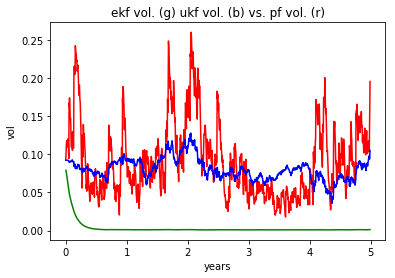

In [148]:
plt.plot(years[:], pf_snp_vol[:], 'r-')
plt.plot(years[1:], ukf_snp_vol[1:], 'b-')
plt.plot(years[1:], ekf_snp_vol[:], 'g-')
plt.title('ekf vol. (g) ukf vol. (b) vs. pf vol. (r)')
plt.xlabel('years')
plt.ylabel('vol')
plt.savefig('./report/figs/snp_filtered_heston')
plt.show()

In [149]:
param_steps.transpose()[-1]

array([ 0.04155238,  6.38829159,  0.11420311,  0.90333571, -0.13135921])

# Plotting Oil Vol. against SNP Vol.

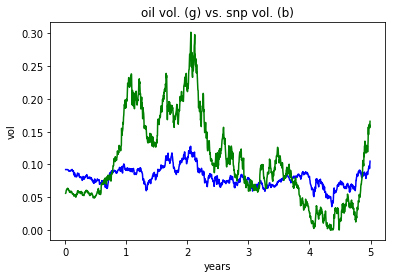

In [162]:
plt.plot(years[1:], ukf_snp_vol[1:], 'b-')
plt.plot(years[1:], ukf_vol[:], 'g-')
plt.title('oil vol. (g) vs. snp vol. (b)')
plt.xlabel('years')
plt.ylabel('vol')
plt.savefig('./report/figs/ukf_oil_snp')
plt.show()

pf filtered vol


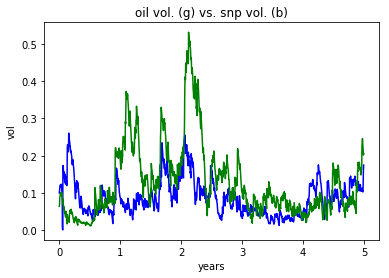

In [164]:
plt.plot(years[1:], pf_snp_vol[1:], 'b-')
plt.plot(years[1:], pf_vol[1:], 'g-')
plt.title('oil vol. (g) vs. snp vol. (b)')
plt.xlabel('years')
plt.ylabel('vol')
plt.savefig('./report/figs/pf_oil_snp')
plt.show()